### Imports:

In [144]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import getpass
import numpy as np
pd.set_option('display.max_columns', None)

desired_username = 'felixlavallee-morissette'
current_username = getpass.getuser()

if current_username == desired_username:
    directory_path = '/Users/felixlavallee-morissette/Documents/GitHub/ISYE-7406-QCF/'
    os.chdir(directory_path)
    print(f"Directory changed to {directory_path}")
else:
    print("This is not Felix's computer. Directory change not executed.")

Directory changed to /Users/felixlavallee-morissette/Documents/GitHub/ISYE-7406-QCF/


### import wind_farm_1_signal_training, correctly format, forward fill NaNs:

In [145]:
wind_farm_1_signal_training_file_path = 'wind-farm-1-signals-training.csv'
wind_farm_1_signal_training_df = pd.read_csv(wind_farm_1_signal_training_file_path, delimiter=';')
wind_farm_1_signal_training_df['Timestamp'] = pd.to_datetime(wind_farm_1_signal_training_df['Timestamp'])
wind_farm_1_signal_training_df['Turbine_ID'] = wind_farm_1_signal_training_df['Turbine_ID'].str.replace('T', '').astype(int)

In [146]:
attributes_matrix = [
    ['Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg'],
    ['Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg', 'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 
         'Gen_Bear2_Temp_Avg', 'Hyd_Oil_Temp_Avg', 'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg', 'Amb_Temp_Avg', 
         'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg', 'HVTrafo_Phase3_Temp_Avg'],
    ['Grd_InverterPhase1_Temp_Avg', 'Grd_RtrInvPhase1_Temp_Avg', 'Grd_RtrInvPhase2_Temp_Avg', 
         'Grd_RtrInvPhase3_Temp_Avg', 'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 
         'Cont_VCP_Temp_Avg', 'Cont_VCP_ChokcoilTemp_Avg', 'Cont_VCP_WtrTemp_Avg', 'Grd_Busbar_Temp_Avg'],
    ['Nac_Direction_Avg', 'Amb_WindDir_Abs_Avg'],
    ['Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg'],
    ['Amb_WindSpeed_Max', 'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg'],
    ['Amb_WindDir_Relative_Avg'], 
    ['Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1', 'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr', 'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1', 'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr'],

    ['Gen_SlipRing_Temp_Avg', 'Spin_Temp_Avg'],
    ['Blds_PitchAngle_Min', 'Blds_PitchAngle_Max', 'Blds_PitchAngle_Avg'],
    ['Grd_Prod_Pwr_Avg', 'Grd_Prod_Pwr_Max', 'Grd_Prod_Pwr_Min'],
    ['Grd_Prod_CosPhi_Avg', 'Grd_Prod_Freq_Avg', 'Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_VoltPhse2_Avg', 'Grd_Prod_VoltPhse3_Avg', 'Grd_Prod_CurPhse1_Avg', 'Grd_Prod_CurPhse2_Avg', 'Grd_Prod_CurPhse3_Avg'],
    ['Grd_Prod_ReactPwr_Avg', 'Grd_Prod_ReactPwr_Max', 'Grd_Prod_ReactPwr_Min'],
    ['Grd_Prod_PsblePwr_Avg', 'Grd_Prod_PsblePwr_Max', 'Grd_Prod_PsblePwr_Min'],
    ['Grd_Prod_PsbleInd_Avg', 'Grd_Prod_PsbleInd_Max', 'Grd_Prod_PsbleInd_Min'],
    ['Grd_Prod_PsbleCap_Avg', 'Grd_Prod_PsbleCap_Max', 'Grd_Prod_PsbleCap_Min']
]

In [147]:
wind_farm_1_signal_training_df

Turbine_ID                 Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
0               11 2016-01-01 00:00:00+00:00       1339.4       1233.3   
1                6 2016-01-01 00:00:00+00:00       1270.0       1232.8   
2                1 2016-01-01 00:00:00+00:00       1277.4       1226.1   
3                9 2016-01-01 00:00:00+00:00       1376.7       1234.3   
4                7 2016-01-01 00:00:00+00:00       1317.5       1229.5   
...            ...                       ...          ...          ...   
434140          11 2017-09-01 00:00:00+00:00       1266.3       1234.3   
434141           9 2017-09-01 00:00:00+00:00       1268.4       1240.1   
434142           6 2017-09-01 00:00:00+00:00       1284.2       1233.4   
434143           1 2017-09-01 00:00:00+00:00       1299.0       1222.1   
434144           7 2017-09-01 00:00:00+00:00       1292.0       1232.5   

        Gen_RPM_Avg  Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
0            1270.9         18.8               42.0                   59   
1            1248.5          6.8               42.0                   51   
2            1249.0          9.0               41.0                   58   
3            1272.0         24.7               40.0                   58   
4            1254.9         13.8               41.0                   62   
...             ...          ...                ...                  ...   
434140       1250.6          5.1               46.0                   60   
434141       1251.9          6.0               44.0                   62   
434142       1252.4          8.8               49.0                   63   
434143       1255.3         12.4               45.0                   64   
434144       1251.9          9.6               48.0                   66   

        Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  \
0                        61                   60                30   
1                        52                   53                30   
2                        59                   58                30   
3                        57                   58                44   
4                        62                   61                32   
...                     ...                  ...               ...   
434140                   61                   61                39   
434141                   61                   62                51   
434142                   64                   65                40   
434143                   64                   64                39   
434144                   67                   66                40   

        Gear_Oil_Temp_Avg  Gear_Bear_Temp_Avg  Nac_Temp_Avg  Rtr_RPM_Max  \
0                      48                  55            27         11.9   
1                      43                  48            29         11.2   
2                      44                  48            28         11.3   
3                      43                  48            29         12.2   
4                      45                  49            27         11.7   
...                   ...                 ...           ...          ...   
434140                 51                  56            31         11.2   
434141                 48                  52            35         11.2   
434142                 51                  54            37         11.4   
434143                 49                  53            34         11.4   
434144                 50                  53            33         11.4   

        Rtr_RPM_Min  Rtr_RPM_Avg  Amb_WindSpeed_Max  Amb_WindSpeed_Min  \
0              10.9         11.3                8.6                2.6   
1              10.9         11.1                6.0                1.6   
2              10.9         11.1               11.6                0.5   
3              10.9         11.2                9.9                1.8   
4              10.9         11.1               14.4                0.9   
...     

In [148]:
def preprocess_ffill(df):
    initial_nan_rows = df.isna().any(axis=1).sum()
    print(f"Rows with at least one NaN before ffill: {initial_nan_rows}")

    df_sorted = df.sort_values(by=['Turbine_ID', 'Timestamp'])
    df_filled = df_sorted.groupby('Turbine_ID').apply(lambda group: group.ffill())
    df_preprocessed = df_filled.reset_index(drop=True)

    post_ffill_nan_rows = df_preprocessed.isna().any(axis=1).sum()
    print(f"Rows with at least one NaN after ffill: {post_ffill_nan_rows}")

    return df_preprocessed

In [149]:
wind_farm_1_signal_training_df = preprocess_ffill(wind_farm_1_signal_training_df)

Rows with at least one NaN before ffill: 7
Rows with at least one NaN after ffill: 0


In [150]:
wind_farm_1_signal_training_df

Turbine_ID                 Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
0                1 2016-01-01 00:00:00+00:00       1277.4       1226.1   
1                1 2016-01-01 00:10:00+00:00       1268.3         93.3   
2                1 2016-01-01 00:20:00+00:00       1394.4        220.3   
3                1 2016-01-01 00:30:00+00:00       1306.6       1212.4   
4                1 2016-01-01 00:40:00+00:00       1320.9       1224.1   
...            ...                       ...          ...          ...   
434140          11 2017-08-31 23:20:00+00:00       1434.3       1243.1   
434141          11 2017-08-31 23:30:00+00:00       1265.2       1238.6   
434142          11 2017-08-31 23:40:00+00:00       1264.6       1235.1   
434143          11 2017-08-31 23:50:00+00:00       1281.4       1231.9   
434144          11 2017-09-01 00:00:00+00:00       1266.3       1234.3   

        Gen_RPM_Avg  Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
0            1249.0          9.0               41.0                   58   
1             999.7        435.9               41.0                   58   
2             774.0        486.1               41.0                   57   
3            1257.1         17.0               40.0                   56   
4            1257.7         18.0               40.0                   57   
...             ...          ...                ...                  ...   
434140       1286.1         46.8               43.0                   56   
434141       1249.8          4.1               43.0                   57   
434142       1248.8          4.7               44.0                   58   
434143       1250.5          6.3               45.0                   59   
434144       1250.6          5.1               46.0                   60   

        Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  \
0                        59                   58                30   
1                        59                   59                30   
2                        57                   57                30   
3                        57                   57                30   
4                        58                   57                30   
...                     ...                  ...               ...   
434140                   57                   56                40   
434141                   58                   58                40   
434142                   59                   59                40   
434143                   60                   60                40   
434144                   61                   61                39   

        Gear_Oil_Temp_Avg  Gear_Bear_Temp_Avg  Nac_Temp_Avg  Rtr_RPM_Max  \
0                      44                  48            28         11.3   
1                      44                  48            28         11.2   
2                      43                  46            29         12.3   
3                      44                  48            28         11.5   
4                      44                  48            28         11.7   
...                   ...                 ...           ...          ...   
434140                 51                  57            31         12.7   
434141                 51                  56            31         11.2   
434142                 50                  55            31         11.2   
434143                 50                  55            31         11.4   
434144                 51                  56            31         11.2   

        Rtr_RPM_Min  Rtr_RPM_Avg  Amb_WindSpeed_Max  Amb_WindSpeed_Min  \
0              10.9         11.1               11.6                0.5   
1               0.0          8.8               12.5                0.4   
2               1.9          6.8                8.8                0.7   
3              10.7         11.1                9.9                0.7   
4              10.8         11.1                9.9                0.8   
...     

### import wind_farm_1_signal_testing, correctly format, foward fill NaNs:

In [151]:
wind_farm_1_signal_testing_file_path = 'wind-farm-1-signals-testing.csv'
wind_farm_1_signal_testing_df = pd.read_csv(wind_farm_1_signal_testing_file_path, delimiter=';')
wind_farm_1_signal_testing_df['Timestamp'] = pd.to_datetime(wind_farm_1_signal_testing_df['Timestamp'])
wind_farm_1_signal_testing_df['Turbine_ID'] = wind_farm_1_signal_testing_df['Turbine_ID'].str.replace('T', '').astype(int)

In [152]:
wind_farm_1_signal_testing_df = preprocess_ffill(wind_farm_1_signal_testing_df)

Rows with at least one NaN before ffill: 0
Rows with at least one NaN after ffill: 0


In [153]:
wind_farm_1_signal_testing_df

Turbine_ID                 Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
0               1 2017-09-01 00:10:00+00:00       1489.5       1228.0   
1               1 2017-09-01 00:20:00+00:00       1608.6       1215.5   
2               1 2017-09-01 00:30:00+00:00       1384.7       1233.7   
3               1 2017-09-01 00:40:00+00:00       1281.7       1223.4   
4               1 2017-09-01 00:50:00+00:00       1260.5       1235.1   
...           ...                       ...          ...          ...   
87634          11 2017-12-31 23:10:00+00:00       1509.1       1226.6   
87635          11 2017-12-31 23:20:00+00:00       1313.6       1216.0   
87636          11 2017-12-31 23:30:00+00:00       1289.9       1220.4   
87637          11 2017-12-31 23:40:00+00:00       1421.2       1221.0   
87638          11 2017-12-31 23:50:00+00:00       1320.5       1216.8   

       Gen_RPM_Avg  Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
0           1309.3         68.7               45.0                   65   
1           1367.0        118.8               46.0                   66   
2           1256.5         23.5               46.0                   65   
3           1249.3         11.0               46.0                   65   
4           1248.4          4.4               46.0                   65   
...            ...          ...                ...                  ...   
87634       1314.6         74.3               42.0                   58   
87635       1252.7         15.6               42.0                   58   
87636       1250.5         12.7               42.0                   57   
87637       1268.9         37.3               42.0                   57   
87638       1262.0         20.6               42.0                   56   

       Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  \
0                       65                   65                39   
1                       66                   65                39   
2                       66                   66                39   
3                       66                   65                38   
4                       66                   65                38   
...                    ...                  ...               ...   
87634                   59                   59                28   
87635                   59                   58                28   
87636                   59                   58                28   
87637                   58                   57                28   
87638                   58                   57                28   

       Gear_Oil_Temp_Avg  Gear_Bear_Temp_Avg  Nac_Temp_Avg  Rtr_RPM_Max  \
0                     50                  53            33         13.2   
1                     50                  54            32         14.3   
2                     50                  54            32         12.3   
3                     49                  53            32         11.4   
4                     49                  52            32         11.2   
...                  ...                 ...           ...          ...   
87634                 51                  58            24         13.4   
87635                 50                  57            23         11.6   
87636                 50                  56            23         11.4   
87637                 50                  56            23         12.6   
87638                 50                  56            23         11.7   

       Rtr_RPM_Min  Rtr_RPM_Avg  Amb_WindSpeed_Max  Amb_WindSpeed_Min  \
0             10.9         11.6                9.9                2.2   
1             10.7         12.1               10.3                1.7   
2             10.9         11.1                9.1                2.2   
3             10.8         11.1                7.8                2.0   
4             11.0         11.1                6.4                1.6   
...            ...          ...                ...           

### import wind_farm_1_metmast_training, correctly format, forward fill NaNs:

In [154]:
wind_farm_1_metmast_training_file_path = 'wind-farm-1-metmast-training.csv'
wind_farm_1_metmast_training_df = pd.read_csv(wind_farm_1_metmast_training_file_path, delimiter=';')
wind_farm_1_metmast_training_df['Timestamp'] = pd.to_datetime(wind_farm_1_metmast_training_df['Timestamp'])

In [155]:
wind_farm_1_metmast_training_df[wind_farm_1_metmast_training_df.isna().any(axis=1)]

Timestamp  Min_Windspeed1  Max_Windspeed1  \
45864 2016-11-14 13:10:00+00:00             0.0             8.5   
67448 2017-08-14 12:40:00+00:00             NaN            16.5   
69751 2017-08-30 13:10:00+00:00             0.3             2.9   
69765 2017-08-30 15:30:00+00:00             0.4             6.2   

       Avg_Windspeed1  Var_Windspeed1  Min_Windspeed2  Max_Windspeed2  \
45864             5.9            1.53             0.0             8.6   
67448             NaN             NaN             NaN            16.0   
69751             1.5            0.33             0.3             3.0   
69765             2.7            1.38             0.3             6.3   

       Avg_Windspeed2  Var_Windspeed2  Min_Winddirection2  Max_Winddirection2  \
45864             5.9            1.52                 0.0                 236   
67448             NaN             NaN                 NaN                 141   
69751             1.5            0.34                23.0                  80   
69765             2.7            1.40               139.0                 276   

       Avg_Winddirection2  Var_Winddirection2  Min_AmbientTemp  \
45864               224.0              2543.0            -40.0   
67448                 NaN                 NaN              NaN   
69751                29.0                 NaN             25.0   
69765               120.0                 NaN             26.0   

       Max_AmbientTemp  Avg_AmbientTemp  Min_Pressure  Max_Pressure  \
45864               21             19.0        1012.0          1013   
67448               27              NaN           NaN          1006   
69751               26             25.0        1008.0          1008   
69765               28             27.0        1007.0          1007   

       Avg_Pressure  Min_Humidity  Max_Humidity  Avg_Humidity  \
45864        1013.0           NaN            43           NaN   
67448           NaN           0.0            67          63.0   
69751        1008.0          59.0            63          61.0   
69765        1007.0          48.0            60          52.0   

       Min_Precipitation  Max_Precipitation  Avg_Precipitation  \
45864                0.0                2.4                2.2   
67448                0.0                0.0                0.0   
69751                0.0                0.0                0.0   
69765                0.0                0.0                0.0   

       Min_Raindetection  Max_Raindetection  Avg_Raindetection  \
45864                  0                  1                  0   
67448                  0                  0                  0   
69751                  0                  0                  0   
69765                  0                  0                  0   

       Anemometer1_Freq  Anemometer1_Offset  Anemometer1_CorrGain  \
45864            0.0499                0.24                     1   
67448            0.0499                0.24                     1   
69751            0.0499                0.24                     1   
69765            0.0499                0.24                     1   

       Anemometer1_CorrOffset  Anemometer2_Freq  Anemometer2_Offset  \
45864                       0            0.0499                0.24   
67448                       0            0.0499                0.24   
69751                       0            0.0499                0.24   
69765                       0            0.0499                0.24   

       Anemometer2_CorrGain  Anemometer2_CorrOffset  DistanceAirPress  \
45864                     1                       0                 0   
67448                     1                       0                 0   
69751                     1                       0                 0   
69765                     1                       0                 0   

       AirRessureSensorZeroOffset  Anemometer1_Avg_Freq  Anemometer2_Avg_Freq  \
45864                         600                   114                   115   
67448    

In [156]:
def preprocess_ffill_no_turbine(df):

    initial_nan_rows = df.isna().any(axis=1).sum()
    print(f"Rows with at least one NaN before ffill: {initial_nan_rows}")

    df_sorted = df.sort_values(by='Timestamp')

    df_filled = df_sorted.ffill()
    df_preprocessed = df_filled.reset_index(drop=True)

    post_ffill_nan_rows = df_preprocessed.isna().any(axis=1).sum()
    print(f"Rows with at least one NaN after ffill: {post_ffill_nan_rows}")

    return df_preprocessed

In [157]:
wind_farm_1_metmast_training_df = preprocess_ffill_no_turbine(wind_farm_1_metmast_training_df)

Rows with at least one NaN before ffill: 4
Rows with at least one NaN after ffill: 0


### import wind_farm_1_metmast_testing, correctly format, forward fill NaNs:

In [158]:
wind_farm_1_metmast_testing_file_path = 'wind-farm-1-metmast-testing.csv'
wind_farm_1_metmast_testing_df = pd.read_csv(wind_farm_1_metmast_testing_file_path, delimiter=';')
wind_farm_1_metmast_testing_df['Timestamp'] = pd.to_datetime(wind_farm_1_metmast_testing_df['Timestamp'])

In [159]:
wind_farm_1_metmast_testing_df[wind_farm_1_metmast_testing_df.isna().any(axis=1)]

Timestamp  Min_Windspeed1  Max_Windspeed1  \
1936  2017-09-14 10:50:00+00:00             0.6             3.1   
10281 2017-11-11 09:40:00+00:00             0.8             5.3   
17361 2017-12-30 13:40:00+00:00             0.0             1.8   

       Avg_Windspeed1  Var_Windspeed1  Min_Windspeed2  Max_Windspeed2  \
1936              1.8            0.33             0.3             3.0   
10281             2.8            0.86             0.7             5.3   
17361             0.8            0.20             0.2             1.8   

       Avg_Windspeed2  Var_Windspeed2  Min_Winddirection2  Max_Winddirection2  \
1936              1.7            0.39                74.0                 272   
10281             2.7            0.84               313.0                 217   
17361             0.8            0.13                47.0                 262   

       Avg_Winddirection2  Var_Winddirection2  Min_AmbientTemp  \
1936                240.0                 NaN             22.0   
10281                68.0                 NaN             15.0   
17361               264.0                 NaN             19.0   

       Max_AmbientTemp  Avg_AmbientTemp  Min_Pressure  Max_Pressure  \
1936                23             23.0        1012.0          1012   
10281               16             15.0        1018.0          1019   
17361               20             19.0        1019.0          1020   

       Avg_Pressure  Min_Humidity  Max_Humidity  Avg_Humidity  \
1936         1012.0          79.0            81          80.0   
10281        1019.0          48.0            49          49.0   
17361        1019.0          71.0            74          72.0   

       Min_Precipitation  Max_Precipitation  Avg_Precipitation  \
1936                 0.0                0.0                0.0   
10281                0.0                0.0                0.0   
17361                0.0                0.0                0.0   

       Min_Raindetection  Max_Raindetection  Avg_Raindetection  \
1936                   0                  0                  0   
10281                  0                  0                  0   
17361                  0                  0                  0   

       Anemometer1_Freq  Anemometer1_Offset  Anemometer1_CorrGain  \
1936             0.0499                0.24                     1   
10281            0.0499                0.24                     1   
17361            0.0499                0.24                     1   

       Anemometer1_CorrOffset  Anemometer2_Freq  Anemometer2_Offset  \
1936                        0            0.0499                0.24   
10281                       0            0.0499                0.24   
17361                       0            0.0499                0.24   

       Anemometer2_CorrGain  Anemometer2_CorrOffset  DistanceAirPress  \
1936                      1                       0                 0   
10281                     1                       0                 0   
17361                     1                       0                 0   

       AirRessureSensorZeroOffset  Anemometer1_Avg_Freq  Anemometer2_Avg_Freq  \
1936                          600                    33                    31   
10281                         600                    52                    51   
17361                         600                    12                    13   

       Pressure_Avg_Freq  
1936                 412  
10281                418  
17361                419

In [160]:
wind_farm_1_metmast_testing_df = preprocess_ffill_no_turbine(wind_farm_1_metmast_testing_df)

Rows with at least one NaN before ffill: 3
Rows with at least one NaN after ffill: 0


### import miscellaneous wind_turbine_datasheet, [FEATURE ENGINEERING]:

In [161]:
wind_turbine_data = {
    "POWER": {
        "Rated power (kW)": "2000",
        "Cut-in wind speed (m/s)": "4",
        "Rated wind speed (m/s)": "12",
        "Cut-out wind speed (m/s)": "25",
        "Wind class (IEC)": "IEC II (7.5 – 8.5 m/s)"
    },
    "ROTOR": {
        "Diameter (m)": "90",
        "Swept area (m^2)": "6362",
        "Number of blades": "3",
        "Rotor speed, max (rpm)": "14.9",
        "Tip speed (m/s)": "70",
        "Power density 1 (W/m^2)": "314.4"
    },
    "GEARBOX": {
        "Type": "Planetary/spur",
        "Stages": "3"
    },
    "GENERATOR": {
        "Type": "Asynchronous",
        "Speed, max (rpm)": "2016",
        "Voltage (V)": "690",
        "Grid frequency (Hz)": "50"
    },
    "TOWER": {
        "Hub height (m)": "80",
        "Type": "Steel tube",
        "Shape": "Conical",
        "Corrosion protection": "Painted"
    },
    "POWER_CURVE": {
        "Wind speed (m/s)": [
            4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10,
            10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5,
            16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20, 20.5, 21,
            21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25
        ],
        "Power (W)": [
            89, 142, 204, 279, 368, 470, 594, 736, 896, 1069, 1247,
            1428, 1599, 1753, 1881, 1951, 1981, 1994, 1998, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000
        ]
    }
}

index = pd.MultiIndex.from_tuples([(category, attribute) for category, attributes in wind_turbine_data.items() for attribute in attributes.keys()], names=["Category", "Attribute"])
wind_turbine_datasheet_df = pd.DataFrame([value for attributes in wind_turbine_data.values() for value in attributes.values()], index=index, columns=["Value"])

In [162]:
wind_turbine_datasheet_df

Value
Category    Attribute                                                                  
POWER       Rated power (kW)                                                       2000
            Cut-in wind speed (m/s)                                                   4
            Rated wind speed (m/s)                                                   12
            Cut-out wind speed (m/s)                                                 25
            Wind class (IEC)                                     IEC II (7.5 – 8.5 m/s)
ROTOR       Diameter (m)                                                             90
            Swept area (m^2)                                                       6362
            Number of blades                                                          3
            Rotor speed, max (rpm)                                                 14.9
            Tip speed (m/s)                                                          70
            Power density 1 (W/m^2)                                               314.4
GEARBOX     Type                                                         Planetary/spur
            Stages                                                                    3
GENERATOR   Type                                                           Asynchronous
            Speed, max (rpm)                                                       2016
            Voltage (V)                                                             690
            Grid frequency (Hz)                                                      50
TOWER       Hub height (m)                                                           80
            Type                                                             Steel tube
            Shape                                                               Conical
            Corrosion protection                                                Painted
POWER_CURVE Wind speed (m/s)          [4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9....
            Power (W)                 [89, 142, 204, 279, 368, 470, 594, 736, 896, 1...

### import wind_farm_signals_variables, correctly format:

In [163]:
wind_farm_signals_variables_data = [
    # Page 1
    ["Gen_RPM_Max", "[rpm]", "FLOAT", "Maximum generator rpm in latest average period", "Generator"],
    ["Gen_RPM_Min", "[rpm]", "FLOAT", "Minimum generator rpm in latest average period", "Generator"],
    ["Gen_RPM_Avg", "[rpm]", "FLOAT", "Average generator rpm", "Generator"],
    ["Gen_RPM_Std", "[rpm]", "FLOAT", "Std. generator rpm in latest average period", "Generator"],
    ["Gen_Bear_Temp_Avg", "[ºC]", "INT", "Average temperature in generator bearing 1 (Non-Drive End)", "Generator"],
    ["Gen_Phase1_Temp_Avg", "[ºC]", "INT", "Average temperature inside generator in stator windings phase 1", "Generator"],
    ["Gen_Phase2_Temp_Avg", "[ºC]", "INT", "Average temperature inside generator in stator windings phase 2", "Generator"],
    ["Gen_Phase3_Temp_Avg", "[ºC]", "INT", "Average temperature inside generator in stator windings phase 3", "Generator"],
    ["Hyd_Oil_Temp_Avg", "[ºC]", "INT", "Average temperature oil in hydraulic group", "Hydraulic"],
    ["Gear_Oil_Temp_Avg", "[ºC]", "INT", "Average temperature oil in gearbox", "Gearbox"],
    ["Gear_Bear_Temp_Avg", "[ºC]", "INT", "Average temperature in gearbox bearing on high speed shaft", "Gearbox"],
    ["Nac_Temp_Avg", "[ºC]", "INT", "Average temperature in nacelle", "Nacelle"],
    ["Rtr_RPM_Max", "[rpm]", "FLOAT", "Maximum rotor rpm in latest average period", "Rotor"],
    ["Rtr_RPM_Min", "[rpm]", "FLOAT", "Minimum rotor rpm in latest average period", "Rotor"],
    ["Rtr_RPM_Avg", "[rpm]", "FLOAT", "Average rotor rpm", "Rotor"],
    ["Amb_WindSpeed_Max", "[m/s]", "FLOAT", "Maximum windspeed within average timebase", "Ambient"],
    ["Amb_WindSpeed_Min", "[m/s]", "FLOAT", "Minimum windspeed within average timebase", "Ambient"],
    ["Amb_WindSpeed_Avg", "[m/s]", "FLOAT", "Average windspeed within average timebase", "Ambient"],
    ["Amb_WindSpeed_Std", "[m/s]", "FLOAT", "Std. windspeed within average timebase", "Ambient"],
    ["Amb_WindDir_Relative_Avg", "[º]", "FLOAT", "Average wind relative direction", "Ambient"],
    ["Amb_WindDir_Abs_Avg", "[º]", "FLOAT", "Average wind absolute direction", "Ambient"],
    ["Amb_Temp_Avg", "[ºC]", "INT", "Average ambient temperature", "Ambient"],
    
    # Page 2
    ["Prod_LatestAvg_ActPwrGen0", "[Wh]", "INT", "Active power - generator disconnected (yaw motor hydraulic motor etc.)", "Production"],
    ["Prod_LatestAvg_ActPwrGen1", "[Wh]", "INT", "Active power - generator connected in delta", "Production"],
    ["Prod_LatestAvg_ActPwrGen2", "[Wh]", "INT", "Active power - generator connected in star", "Production"],
    ["Prod_LatestAvg_TotActPwr", "[Wh]", "INT", "Total active power", "Production"],
    ["Prod_LatestAvg_ReactPwrGen0", "[VArh]", "INT", "Reactive power - generator disconnected (yaw motor hydraulic motor etc.)", "Production"],
    ["Prod_LatestAvg_ReactPwrGen1", "[VArh]", "INT", "Reactive power - generator connected in delta", "Production"],
    ["Prod_LatestAvg_ReactPwrGen2", "[VArh]", "INT", "Reactive power - generator connected in star", "Production"],
    ["Prod_LatestAvg_TotReactPwr", "[VArh]", "INT", "Total reactive power", "Production"],
    ["HVTrafo_Phase1_Temp_Avg", "[ºC]", "INT", "Average temperature in HV transformer phase L1", "Transformer"],
    ["HVTrafo_Phase2_Temp_Avg", "[ºC]", "INT", "Average temperature in HV transformer phase L2", "Transformer"],
    ["HVTrafo_Phase3_Temp_Avg", "[ºC]", "INT", "Average temperature in HV transformer phase L3", "Transformer"],
    ["Grd_InverterPhase1_Temp_Avg", "[ºC]", "INT", "Average temperature measured by the IGBT-driver on the grid side inverter", "Grid"],
    ["Cont_Top_Temp_Avg", "[ºC]", "INT", "Average temperature in the top nacelle controller", "Controller"],
    ["Cont_Hub_Temp_Avg", "[ºC]", "INT", "Average temperature in the hub controller", "Controller"],
    ["Cont_VCP_Temp_Avg", "[ºC]", "INT", "Average temperature on the VCP-board", "Controller"],
    ["Gen_SlipRing_Temp_Avg", "[ºC]", "INT", "Average temperature in the split ring chamber", "Generator"],
    ["Spin_Temp_Avg", "[ºC]", "INT", "Average temperature in the nose cone", "Spinner"],
    ["Blds_PitchAngle_Min", "[º]", "FLOAT", "Maximum angle in latest average period", "Blades"],
    ["Blds_PitchAngle_Max", "[º]", "FLOAT", "Minimum angle in latest average period", "Blades"],
    ["Blds_PitchAngle_Avg", "[º]", "FLOAT", "Average angle", "Blades"],
    ["Blds_PitchAngle_Std", "[º]", "FLOAT", "Std. angle in latest average period", "Blades"],
    ["Cont_VCP_ChokcoilTemp_Avg", "[ºC]", "INT", "Average temperature in the choke coils on the VCS-section", "Controller"],
    ["Grd_RtrInvPhase1_Temp_Avg", "[ºC]", "INT", "Average temperature measured by the IGBT-driver on the rotor side inverter phase1", "Grid"],
    ["Grd_RtrInvPhase2_Temp_Avg", "[ºC]", "INT", "Average temperature measured by the IGBT-driver on the rotor side inverter phase2", "Grid"],
    ["Grd_RtrInvPhase3_Temp_Avg", "[ºC]", "INT", "Average temperature measured by the IGBT-driver on the rotor side inverter phase3", "Grid"],
    ["Cont_VCP_WtrTemp_Avg", "[ºC]", "INT", "Average temperature in the VCS cooling water", "Controller"],
    ["Grd_Prod_Pwr_Avg", "[kW]", "FLOAT", "Power average according to Grid", "Grid"],
    ["Grd_Prod_CosPhi_Avg", "", "FLOAT", "Average actual phase displacement Grid", "Grid"],
    ["Grd_Prod_Freq_Avg", "[Hz]", "FLOAT", "Average frequency Grid", "Grid"],

    # Page 3
    ["Grd_Prod_VoltPhse1_Avg", "[V]", "FLOAT", "Averaged voltage in phase 1 Grid", "Grid"],
    ["Grd_Prod_VoltPhse2_Avg", "[V]", "FLOAT", "Averaged voltage in phase 2 Grid", "Grid"],
    ["Grd_Prod_VoltPhse3_Avg", "[V]", "FLOAT", "Averaged voltage in phase 3 Grid", "Grid"],
    ["Grd_Prod_CurPhse1_Avg", "[A]", "FLOAT", "Averaged current in phase 1 Grid", "Grid"],
    ["Grd_Prod_CurPhse2_Avg", "[A]", "FLOAT", "Averaged current in phase 2 Grid", "Grid"],
    ["Grd_Prod_CurPhse3_Avg", "[A]", "FLOAT", "Averaged current in phase 3 Grid", "Grid"],
    ["Grd_Prod_Pwr_Max", "[kW]", "FLOAT", "Maximum Power in latest average period Grid", "Grid"],
    ["Grd_Prod_Pwr_Min", "[kW]", "FLOAT", "Minimum Power in latest average period Grid", "Grid"],
    ["Grd_Busbar_Temp_Avg", "[ºC]", "INT", "Average temperature in the busbar section Grid", "Grid"],
    ["Rtr_RPM_Std", "[rpm]", "FLOAT", "Std. rotor rpm in latest average period Rotor", "Rotor"],
    ["Amb_WindSpeed_Est_Avg", "[m/s]", "FLOAT", "Average windspeed within average timebase Ambient", "Ambient"],
    ["Grd_Prod_Pwr_Std", "[kW]", "FLOAT", "Std. power in latest average period Grid", "Grid"],
    ["Grd_Prod_ReactPwr_Avg", "[kVAr]", "FLOAT", "Average grid reactive power Grid", "Grid"],
    ["Grd_Prod_ReactPwr_Max", "[kVAr]", "FLOAT", "Maximum grid reactive power Grid", "Grid"],
    ["Grd_Prod_ReactPwr_Min", "[kVAr]", "FLOAT", "Minimum grid reactive Power Grid", "Grid"],
    ["Grd_Prod_ReactPwr_Std", "[kVAr]", "FLOAT", "Std. Deviation grid reactive power Grid", "Grid"],
    ["Grd_Prod_PsblePwr_Avg", "[kW]", "FLOAT", "Average possible grid active power Grid", "Grid"],
    ["Grd_Prod_PsblePwr_Max", "[kW]", "FLOAT", "Maximum possible grid active power Grid", "Grid"],
    ["Grd_Prod_PsblePwr_Min", "[kW]", "FLOAT", "Minimum possible grid active power Grid", "Grid"],
    ["Grd_Prod_PsblePwr_Std", "[kW]", "FLOAT", "Std. possible grid active power Grid", "Grid"],
    ["Grd_Prod_PsbleInd_Avg", "[kVAr]", "FLOAT", "Average possible inductive reactive power Grid", "Grid"],
    ["Grd_Prod_PsbleInd_Max", "[kVAr]", "FLOAT", "Maximum possible inductive reactive power Grid", "Grid"],
    ["Grd_Prod_PsbleInd_Min", "[kVAr]", "FLOAT", "Minimum possible inductive reactive power Grid", "Grid"],
    ["Grd_Prod_PsbleInd_Std", "[kVAr]", "FLOAT", "Std. possible inductive reactive power Grid", "Grid"],
    ["Grd_Prod_PsbleCap_Avg", "[kVAr]", "FLOAT", "Average possible capacitive reactive power Grid", "Grid"],
    ["Grd_Prod_PsbleCap_Max", "[kVAr]", "FLOAT", "Maximum possible capacitive reactive power Grid", "Grid"],
    ["Grd_Prod_PsbleCap_Min", "[kVAr]", "FLOAT", "Minimum possible capacitive reactive power Grid", "Grid"],
    ["Grd_Prod_PsbleCap_Std", "[kVAr]", "FLOAT", "Std. possible capacitive reactive power Grid", "Grid"],
    ["Gen_Bear2_Temp_Avg", "[ºC]", "INT", "Average temperature in generator bearing 2 (Drive End)", "Generator"],
    ["Nac_Direction_Avg", "[º]", "FLOAT", "Average nacelle direction Nacelle", "Nacelle"]
]

columns = ["Descriptor", "Units", "Datatype", "Description", "Component"]
wind_farm_signals_variables_df = pd.DataFrame(wind_farm_signals_variables_data, columns=columns)

In [164]:
wind_farm_signals_variables_df

Descriptor   Units Datatype  \
0             Gen_RPM_Max   [rpm]    FLOAT   
1             Gen_RPM_Min   [rpm]    FLOAT   
2             Gen_RPM_Avg   [rpm]    FLOAT   
3             Gen_RPM_Std   [rpm]    FLOAT   
4       Gen_Bear_Temp_Avg    [ºC]      INT   
..                    ...     ...      ...   
76  Grd_Prod_PsbleCap_Max  [kVAr]    FLOAT   
77  Grd_Prod_PsbleCap_Min  [kVAr]    FLOAT   
78  Grd_Prod_PsbleCap_Std  [kVAr]    FLOAT   
79     Gen_Bear2_Temp_Avg    [ºC]      INT   
80      Nac_Direction_Avg     [º]    FLOAT   

                                          Description  Component  
0      Maximum generator rpm in latest average period  Generator  
1      Minimum generator rpm in latest average period  Generator  
2                               Average generator rpm  Generator  
3         Std. generator rpm in latest average period  Generator  
4   Average temperature in generator bearing 1 (No...  Generator  
..                                                ...        ...  
76    Maximum possible capacitive reactive power Grid       Grid  
77    Minimum possible capacitive reactive power Grid       Grid  
78       Std. possible capacitive reactive power Grid       Grid  
79  Average temperature in generator bearing 2 (Dr...  Generator  
80                  Average nacelle direction Nacelle    Nacelle  

[81 rows x 5 columns]

### import htw_failures_training, correctly format:

In [165]:
htw_failures_training_file_path = 'htw-failures-training.csv'
htw_failures_training_df = pd.read_csv(htw_failures_training_file_path)
htw_failures_training_df['Timestamp'] = pd.to_datetime(htw_failures_training_df['Timestamp'])
htw_failures_training_df['Turbine_ID'] = htw_failures_training_df['Turbine_ID'].str.replace('T', '').astype(int)

# Rounding the 'Timestamp' column to the nearest 10 minutes
htw_failures_training_df['Timestamp'] = htw_failures_training_df['Timestamp'].dt.floor('10T')
htw_failures_training_df = htw_failures_training_df[htw_failures_training_df['Component'].isin(['GEARBOX', 'HYDRAULIC_GROUP'])]

In [166]:
htw_failures_training_df

Turbine_ID        Component                 Timestamp  \
1            6  HYDRAULIC_GROUP 2016-04-04 18:50:00+00:00   
6            1          GEARBOX 2016-07-18 02:10:00+00:00   
12           9          GEARBOX 2016-10-11 08:00:00+00:00   
14          11  HYDRAULIC_GROUP 2016-10-17 17:40:00+00:00   
17          11  HYDRAULIC_GROUP 2017-04-26 18:00:00+00:00   
18           7  HYDRAULIC_GROUP 2017-06-17 11:30:00+00:00   
20           6  HYDRAULIC_GROUP 2017-08-19 09:40:00+00:00   

                                       Remarks  
1                    Error in pitch regulation  
6                         Gearbox pump damaged  
12                            Gearbox repaired  
14  Hydraulic group error in the brake circuit  
17  Hydraulic group error in the brake circuit  
18                          Oil leakage in Hub  
20                          Oil leakage in Hub

### visualizations of missing data:

In [167]:
#Training
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

start_date = wind_farm_1_metmast_training_df['Timestamp'].min()
end_date = wind_farm_1_metmast_training_df['Timestamp'].max()
all_dates = pd.Series(pd.date_range(start=start_date, end=end_date, freq='10T'), name='Timestamp')
merged_df = pd.merge(all_dates, wind_farm_1_metmast_training_df, on=['Timestamp'], how='left')
merged_df['Missing_Weather'] = merged_df.isnull().any(axis=1).astype(int)
print(f"For {len(merged_df)} timesteps, the number of Missing Weather timesteps is: {merged_df['Missing_Weather'].sum()} timesteps")

#Training

start_date = wind_farm_1_metmast_testing_df['Timestamp'].min()
end_date = wind_farm_1_metmast_testing_df['Timestamp'].max()
all_dates = pd.Series(pd.date_range(start=start_date, end=end_date, freq='10T'), name='Timestamp')
test_merged_df = pd.merge(all_dates, wind_farm_1_metmast_testing_df, on=['Timestamp'], how='left')
test_merged_df['Missing_Weather'] = test_merged_df.isnull().any(axis=1).astype(int)
print(f"For {len(test_merged_df)} timesteps, the number of Missing Weather timesteps is: {test_merged_df['Missing_Weather'].sum()} timesteps")

For 87697 timesteps, the number of Missing Weather timesteps is: 17736 timesteps
For 17567 timesteps, the number of Missing Weather timesteps is: 0 timesteps


In [168]:
#Training
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Adjust strategy as needed
data_for_imputation = merged_df.drop(columns=['Timestamp'])
imputed_data = imputer.fit_transform(data_for_imputation)

imputed_df = pd.DataFrame(imputed_data, columns=data_for_imputation.columns)

imputed_df = pd.concat([merged_df['Timestamp'].reset_index(drop=True), imputed_df], axis=1)

training_merged_data = pd.merge(wind_farm_1_signal_training_df, imputed_df, on=['Timestamp'], how='left')

training_merged_data = pd.merge(training_merged_data, htw_failures_training_df, 
                                on=['Timestamp', 'Turbine_ID'], 
                                how='left')

#Testing - no missing data

imputer = SimpleImputer(strategy='mean')  # Adjust strategy as needed
data_for_imputation = test_merged_df.drop(columns=['Timestamp'])
imputed_data = imputer.fit_transform(data_for_imputation)

imputed_df = pd.DataFrame(imputed_data, columns=data_for_imputation.columns)

imputed_df = pd.concat([test_merged_df['Timestamp'].reset_index(drop=True), imputed_df], axis=1)

testing_merged_data = pd.merge(wind_farm_1_signal_testing_df, imputed_df, on=['Timestamp'], how='left')



In [169]:
testing_merged_data.isna().sum().sum()

0

In [170]:
'''# Step 1: Group by day and check if 'component' column has any non-NaN value
non_nan_days = training_merged_data.groupby(training_merged_data['Timestamp'].dt.date)['Component'].apply(lambda x: x.notna().any())

# Step 2: Fill missing values for each day with the non-NaN value for that day
for day, has_non_nan in non_nan_days.items():
    if has_non_nan:
        non_nan_value = training_merged_data.loc[training_merged_data['Timestamp'].dt.date == day, 'Component'].dropna().iloc[0]
        # Filter for the 10 days before the failure day
        days_to_fill = pd.date_range(end=day, periods=10, freq='D').date
        for fill_day in days_to_fill:
            training_merged_data.loc[training_merged_data['Timestamp'].dt.date == fill_day, 'Component'] = non_nan_value'''

"# Step 1: Group by day and check if 'component' column has any non-NaN value\nnon_nan_days = training_merged_data.groupby(training_merged_data['Timestamp'].dt.date)['Component'].apply(lambda x: x.notna().any())\n\n# Step 2: Fill missing values for each day with the non-NaN value for that day\nfor day, has_non_nan in non_nan_days.items():\n    if has_non_nan:\n        non_nan_value = training_merged_data.loc[training_merged_data['Timestamp'].dt.date == day, 'Component'].dropna().iloc[0]\n        # Filter for the 10 days before the failure day\n        days_to_fill = pd.date_range(end=day, periods=10, freq='D').date\n        for fill_day in days_to_fill:\n            training_merged_data.loc[training_merged_data['Timestamp'].dt.date == fill_day, 'Component'] = non_nan_value"

In [171]:
# Step 1: Group the DataFrame by day and Turbine_ID
df = training_merged_data.copy()
grouped = df.groupby([df['Timestamp'].dt.date, 'Turbine_ID'])

# Step 2: Iterate over each group and fill missing values
for (day, turbine_id), group in grouped:
    non_nan_value_mask = group['Component'].notna()
    if non_nan_value_mask.any():
        non_nan_value = group.loc[non_nan_value_mask, 'Component'].iloc[0]
        # Step 3: Fill NaN values for the current day and Turbine_ID
        df.loc[(df['Timestamp'].dt.date == day) & (df['Turbine_ID'] == turbine_id) & (df['Component'].isna()), 'Component'] = non_nan_value
        # Step 4: Fill NaN values for the 15 days before the current day and same Turbine_ID
        for i in range(1, 16):
            prev_day = day - pd.Timedelta(days=i)
            df.loc[(df['Timestamp'].dt.date == prev_day) & (df['Turbine_ID'] == turbine_id) & (df['Component'].isna()), 'Component'] = non_nan_value

training_merged_data=df

In [172]:
training_merged_data["Component"].value_counts()

Component
HYDRAULIC_GROUP    11474
GEARBOX             4585
Name: count, dtype: int64

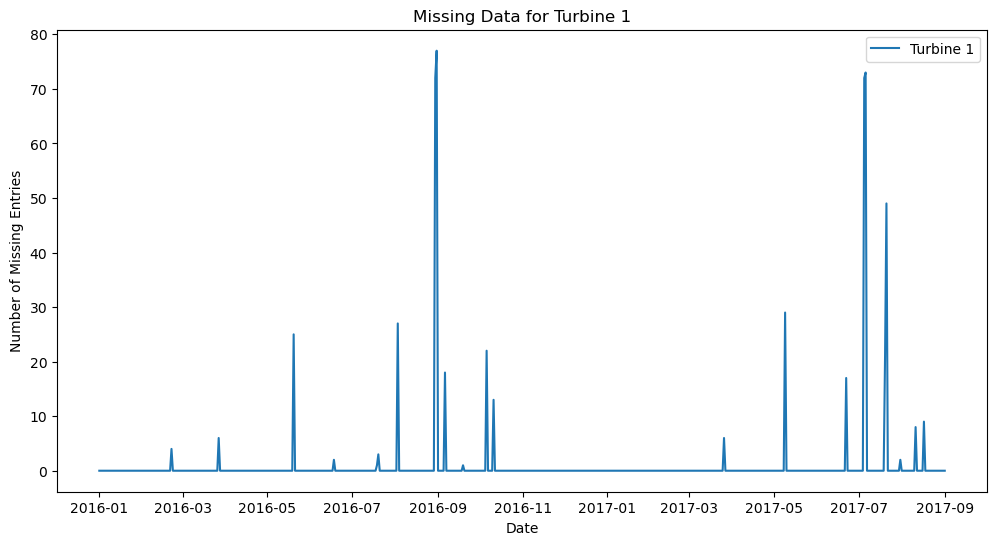

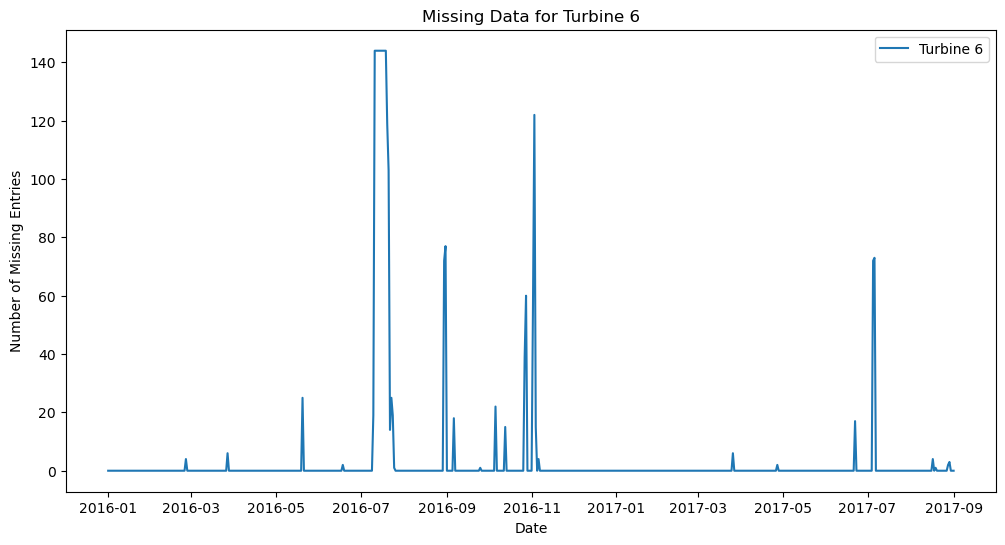

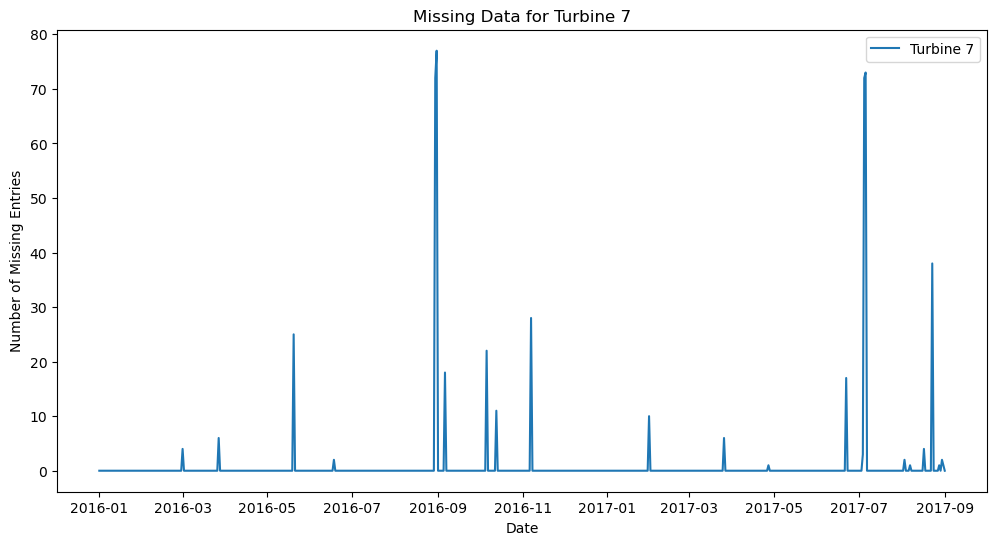

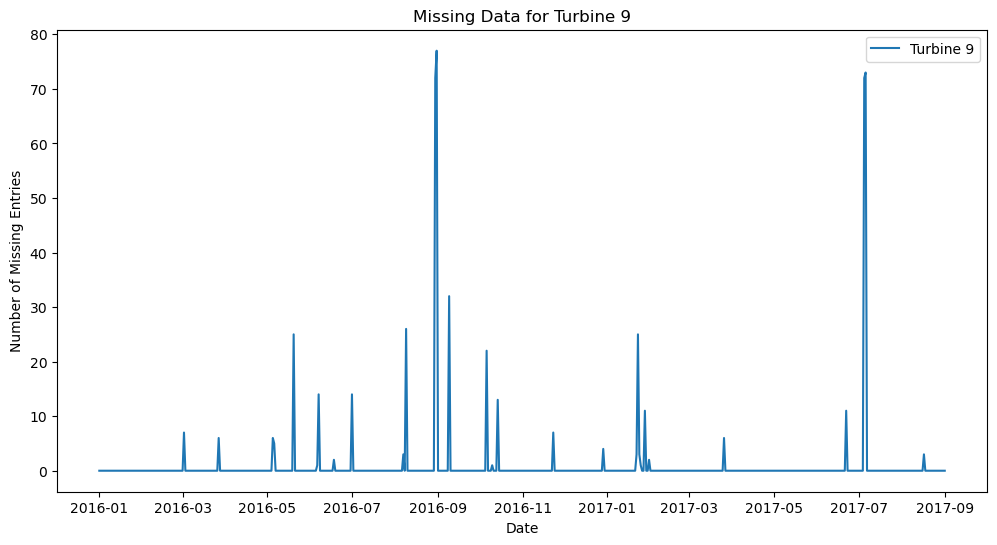

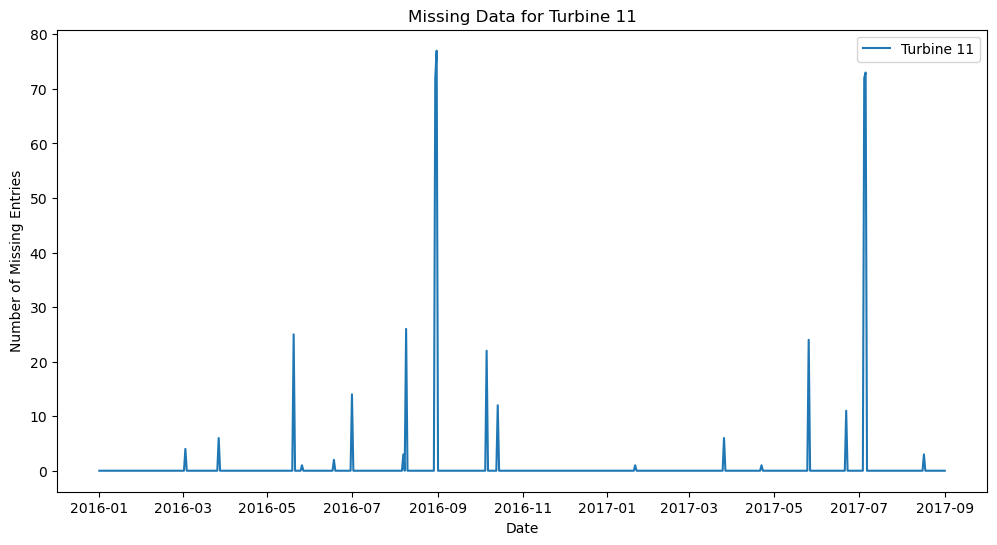

In [173]:
##Training
dummy = wind_farm_1_signal_training_df
df = dummy

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 1. Identify Start and End Date
start_date = df['Timestamp'].min()
end_date = df['Timestamp'].max()

# 2. Create a 10-Minute Interval Time Series
all_dates = pd.date_range(start=start_date, end=end_date, freq='10T')

# Create a DataFrame with all turbine IDs and all dates
turbine_ids = df['Turbine_ID'].unique()
all_dates_df = pd.MultiIndex.from_product([turbine_ids, all_dates], names=['Turbine_ID', 'Timestamp']).to_frame(index=False)

# 3. Merge with Original Data
merged_df = pd.merge(all_dates_df, df, on=['Turbine_ID', 'Timestamp'], how='left')

merged_df['Missing'] = merged_df.isnull().any(axis=1).astype(int)

# Group by Turbine_ID and Timestamp (daily)
daily_missing = merged_df.groupby(['Turbine_ID', pd.Grouper(key='Timestamp', freq='D')])['Missing'].sum().reset_index()

# 5. Plotting
for turbine_id in turbine_ids:
    turbine_data = daily_missing[daily_missing['Turbine_ID'] == turbine_id]
    plt.figure(figsize=(12, 6))
    plt.plot(turbine_data['Timestamp'], turbine_data['Missing'], label=f'Turbine {turbine_id}')
    plt.title(f'Missing Data for Turbine {turbine_id}')
    plt.xlabel('Date')
    plt.ylabel('Number of Missing Entries')
    plt.legend()
    plt.show()


##Testing
dummy = wind_farm_1_signal_testing_df
df = dummy

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 1. Identify Start and End Date
start_date = df['Timestamp'].min()
end_date = df['Timestamp'].max()

# 2. Create a 10-Minute Interval Time Series
all_dates = pd.date_range(start=start_date, end=end_date, freq='10T')

# Create a DataFrame with all turbine IDs and all dates
turbine_ids = df['Turbine_ID'].unique()
all_dates_df = pd.MultiIndex.from_product([turbine_ids, all_dates], names=['Turbine_ID', 'Timestamp']).to_frame(index=False)

# 3. Merge with Original Data
testing_merged_df = pd.merge(all_dates_df, df, on=['Turbine_ID', 'Timestamp'], how='left')

testing_merged_df['Missing'] = testing_merged_df.isnull().any(axis=1).astype(int)

# Group by Turbine_ID and Timestamp (daily)
daily_missing = testing_merged_df.groupby(['Turbine_ID', pd.Grouper(key='Timestamp', freq='D')])['Missing'].sum().reset_index()


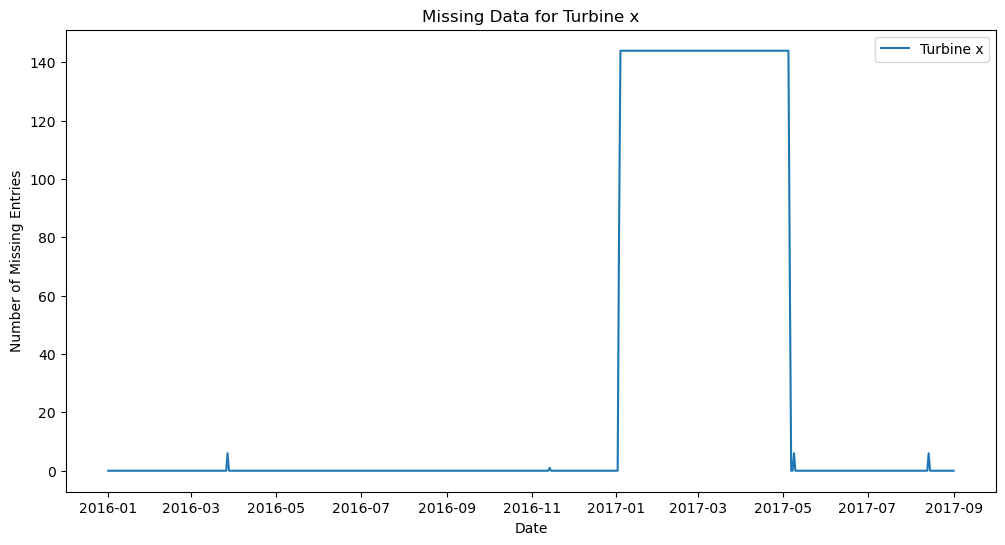

In [174]:
##Training
dummy = wind_farm_1_metmast_training_df
dummy['Turbine_ID'] = 'x'
df = dummy

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 1. Identify Start and End Date
start_date = df['Timestamp'].min()
end_date = df['Timestamp'].max()

# 2. Create a 10-Minute Interval Time Series
all_dates = pd.date_range(start=start_date, end=end_date, freq='10T')

# Create a DataFrame with all turbine IDs and all dates
turbine_ids = df['Turbine_ID'].unique()
all_dates_df = pd.MultiIndex.from_product([turbine_ids, all_dates], names=['Turbine_ID', 'Timestamp']).to_frame(index=False)

# 3. Merge with Original Data
merged_df = pd.merge(all_dates_df, df, on=['Turbine_ID', 'Timestamp'], how='left')

merged_df['Missing'] = merged_df.isnull().any(axis=1).astype(int)

# Group by Turbine_ID and Timestamp (daily)
daily_missing = merged_df.groupby(['Turbine_ID', pd.Grouper(key='Timestamp', freq='D')])['Missing'].sum().reset_index()

# 5. Plotting
for turbine_id in turbine_ids:
    turbine_data = daily_missing[daily_missing['Turbine_ID'] == turbine_id]
    plt.figure(figsize=(12, 6))
    plt.plot(turbine_data['Timestamp'], turbine_data['Missing'], label=f'Turbine {turbine_id}')
    plt.title(f'Missing Data for Turbine {turbine_id}')
    plt.xlabel('Date')
    plt.ylabel('Number of Missing Entries')
    plt.legend()
    plt.show()

##Testing
dummy = wind_farm_1_metmast_testing_df
dummy['Turbine_ID'] = 'x'
df = dummy

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 1. Identify Start and End Date
start_date = df['Timestamp'].min()
end_date = df['Timestamp'].max()

# 2. Create a 10-Minute Interval Time Series
all_dates = pd.date_range(start=start_date, end=end_date, freq='10T')

# Create a DataFrame with all turbine IDs and all dates
turbine_ids = df['Turbine_ID'].unique()
all_dates_df = pd.MultiIndex.from_product([turbine_ids, all_dates], names=['Turbine_ID', 'Timestamp']).to_frame(index=False)

# 3. Merge with Original Data
testing_merged_df = pd.merge(all_dates_df, df, on=['Turbine_ID', 'Timestamp'], how='left')

testing_merged_df['Missing'] = merged_df.isnull().any(axis=1).astype(int)

# Group by Turbine_ID and Timestamp (daily)
daily_missing = testing_merged_df.groupby(['Turbine_ID', pd.Grouper(key='Timestamp', freq='D')])['Missing'].sum().reset_index()

### Feature Visualizations

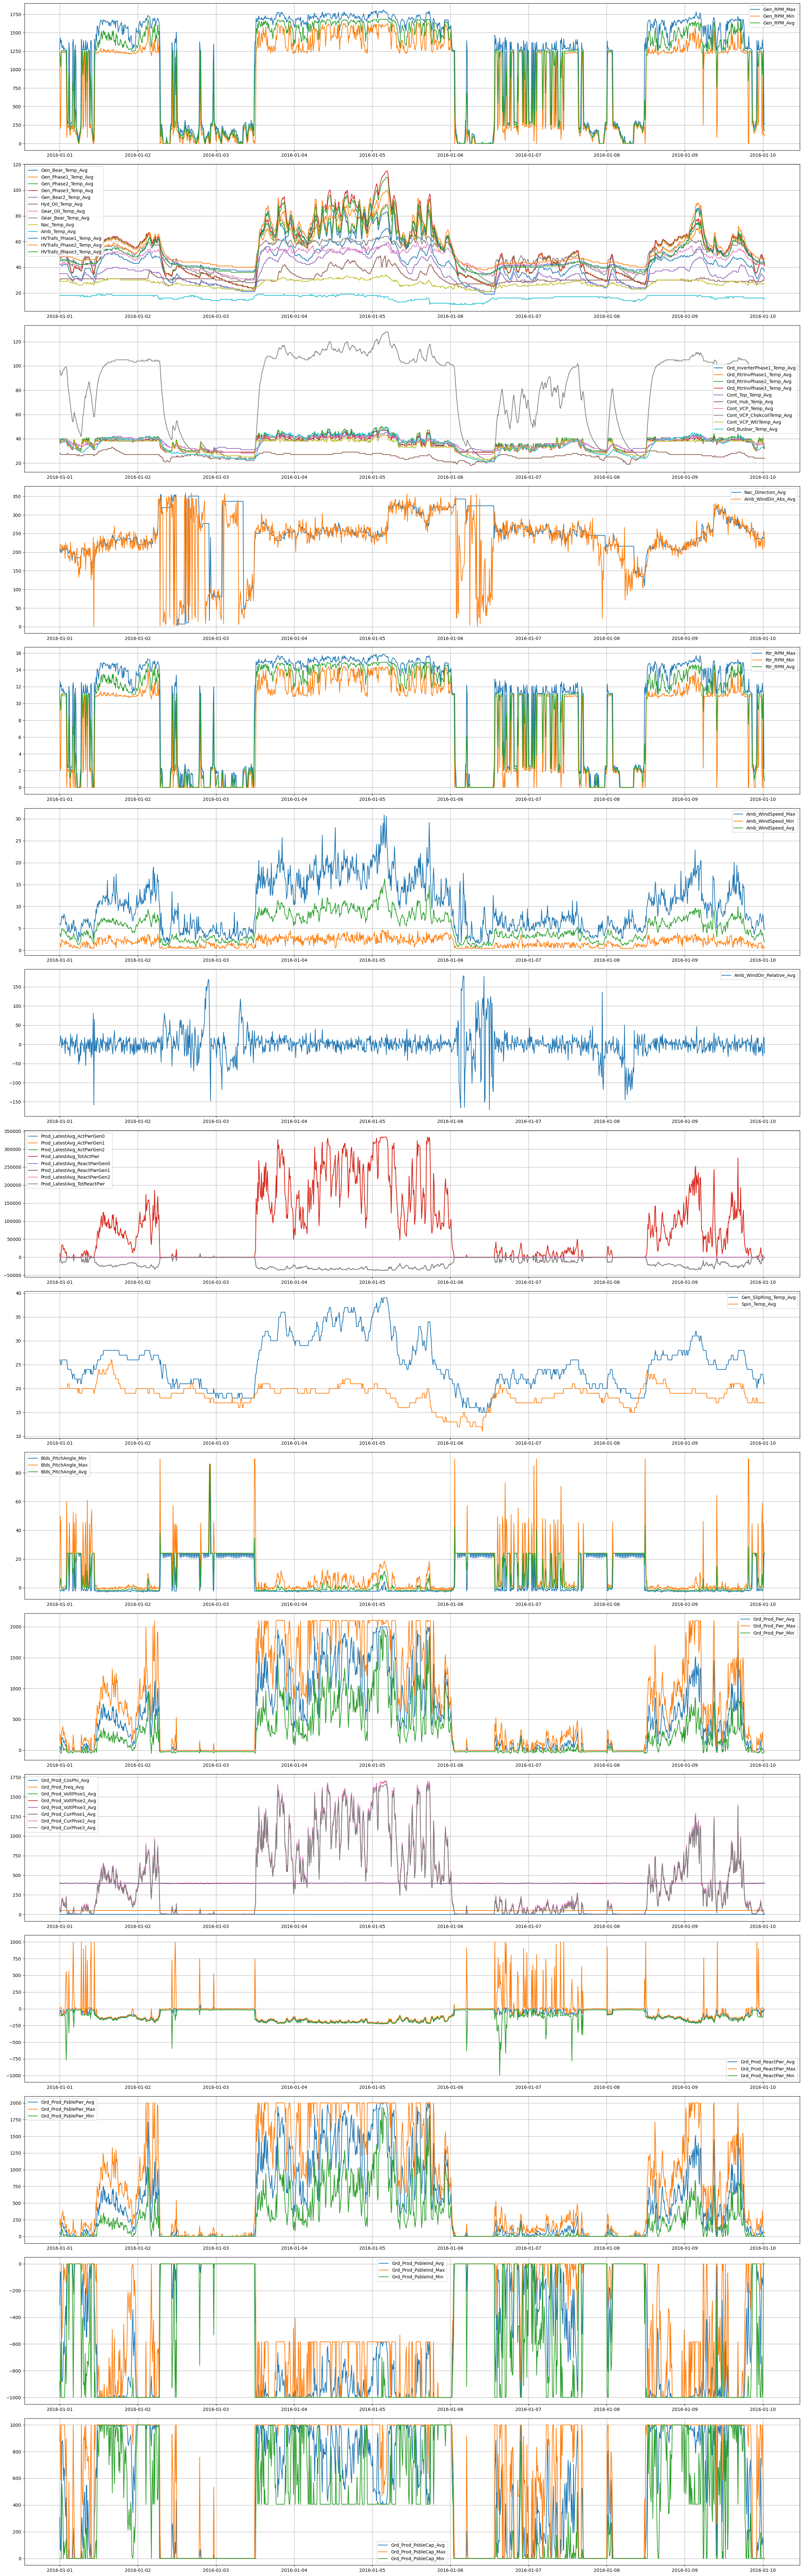

In [175]:
t01_data = wind_farm_1_signal_training_df[wind_farm_1_signal_training_df['Turbine_ID'] == 6]
total_rows = len(attributes_matrix)
fig, axes = plt.subplots(nrows=total_rows, figsize=(25, 5 * total_rows))  # Adjust figsize as needed

steps = range(0, 1300)
for i, row in enumerate(attributes_matrix):
    for col in row:
        axes[i].plot(t01_data['Timestamp'].iloc[steps], t01_data[col].iloc[steps], label=col)  # Adjust range as needed

    axes[i].legend()
    axes[i].grid()

plt.tight_layout()
plt.savefig('plot.pdf')
plt.show()

### X matrix

In [176]:
#Training
training_merged_data.drop(columns=['Remarks'], inplace=True)
training_merged_data['Component'] = training_merged_data['Component'].fillna('NONE')
training_merged_data['Component'] = pd.Categorical(training_merged_data['Component'])

#Testing

'''testing_merged_data['Component'] = testing_merged_data['Component'].fillna('NONE')
testing_merged_data['Component'] = pd.Categorical(testing_merged_data['Component'])'''

"testing_merged_data['Component'] = testing_merged_data['Component'].fillna('NONE')\ntesting_merged_data['Component'] = pd.Categorical(testing_merged_data['Component'])"

In [177]:
training_merged_data

Turbine_ID                 Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
0                1 2016-01-01 00:00:00+00:00       1277.4       1226.1   
1                1 2016-01-01 00:10:00+00:00       1268.3         93.3   
2                1 2016-01-01 00:20:00+00:00       1394.4        220.3   
3                1 2016-01-01 00:30:00+00:00       1306.6       1212.4   
4                1 2016-01-01 00:40:00+00:00       1320.9       1224.1   
...            ...                       ...          ...          ...   
434140          11 2017-08-31 23:20:00+00:00       1434.3       1243.1   
434141          11 2017-08-31 23:30:00+00:00       1265.2       1238.6   
434142          11 2017-08-31 23:40:00+00:00       1264.6       1235.1   
434143          11 2017-08-31 23:50:00+00:00       1281.4       1231.9   
434144          11 2017-09-01 00:00:00+00:00       1266.3       1234.3   

        Gen_RPM_Avg  Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
0            1249.0          9.0               41.0                   58   
1             999.7        435.9               41.0                   58   
2             774.0        486.1               41.0                   57   
3            1257.1         17.0               40.0                   56   
4            1257.7         18.0               40.0                   57   
...             ...          ...                ...                  ...   
434140       1286.1         46.8               43.0                   56   
434141       1249.8          4.1               43.0                   57   
434142       1248.8          4.7               44.0                   58   
434143       1250.5          6.3               45.0                   59   
434144       1250.6          5.1               46.0                   60   

        Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  \
0                        59                   58                30   
1                        59                   59                30   
2                        57                   57                30   
3                        57                   57                30   
4                        58                   57                30   
...                     ...                  ...               ...   
434140                   57                   56                40   
434141                   58                   58                40   
434142                   59                   59                40   
434143                   60                   60                40   
434144                   61                   61                39   

        Gear_Oil_Temp_Avg  Gear_Bear_Temp_Avg  Nac_Temp_Avg  Rtr_RPM_Max  \
0                      44                  48            28         11.3   
1                      44                  48            28         11.2   
2                      43                  46            29         12.3   
3                      44                  48            28         11.5   
4                      44                  48            28         11.7   
...                   ...                 ...           ...          ...   
434140                 51                  57            31         12.7   
434141                 51                  56            31         11.2   
434142                 50                  55            31         11.2   
434143                 50                  55            31         11.4   
434144                 51                  56            31         11.2   

        Rtr_RPM_Min  Rtr_RPM_Avg  Amb_WindSpeed_Max  Amb_WindSpeed_Min  \
0              10.9         11.1               11.6                0.5   
1               0.0          8.8               12.5                0.4   
2               1.9          6.8                8.8                0.7   
3              10.7         11.1                9.9                0.7   
4              10.8         11.1                9.9                0.8   
...     

In [178]:
#Training
X = training_merged_data.drop(columns=['Component'])
y = training_merged_data['Component']

#Testing
X_ = testing_merged_data


In [179]:
y.value_counts()

Component
NONE               418086
HYDRAULIC_GROUP     11474
GEARBOX              4585
Name: count, dtype: int64

partitioning for model building

In [180]:

from sklearn.preprocessing import StandardScaler

# Assuming X is your DataFrame
# Drop 'Timestamp' column and scale the remaining data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X.drop(columns='Timestamp'))

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=X.drop(columns='Timestamp').columns)

# Concatenate 'Timestamp' column with scaled DataFrame
X_scaled = pd.concat([X['Timestamp'], scaled_df], axis=1)

#----------Testing
# Assuming X_ is your DataFrame
# Drop 'Timestamp' column and scale the remaining data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_.drop(columns='Timestamp'))

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=X_.drop(columns='Timestamp').columns)

# Concatenate 'Timestamp' column with scaled DataFrame
X_ = pd.concat([X_['Timestamp'], scaled_df], axis=1)


In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

### PCA

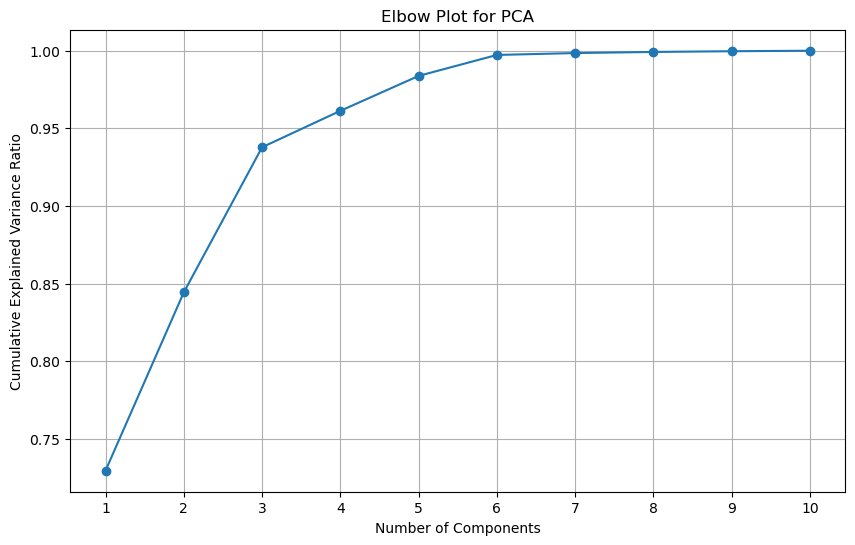

In [182]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

dataGen = X_train.filter(like='Gen_')
pca=PCA()
pca.fit(dataGen)

# Calculate cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

# Fit PCA model to the data
pca = PCA(n_components=3)
pca.fit(dataGen)

# Transform the data into the reduced-dimensional space
transformed_data = pca.transform(dataGen)
transformed_df1 = pd.DataFrame(transformed_data, columns=['Gen_PC1','Gen_PC2','Gen_PC3'])
transformed_df1_test = pd.DataFrame(pca.transform(X_test.filter(like='Gen_')), columns=['Gen_PC1','Gen_PC2','Gen_PC3'])

testing_transformed_df1 = pd.DataFrame(pca.transform(X_.filter(like='Gen_')), columns=['Gen_PC1','Gen_PC2','Gen_PC3'])

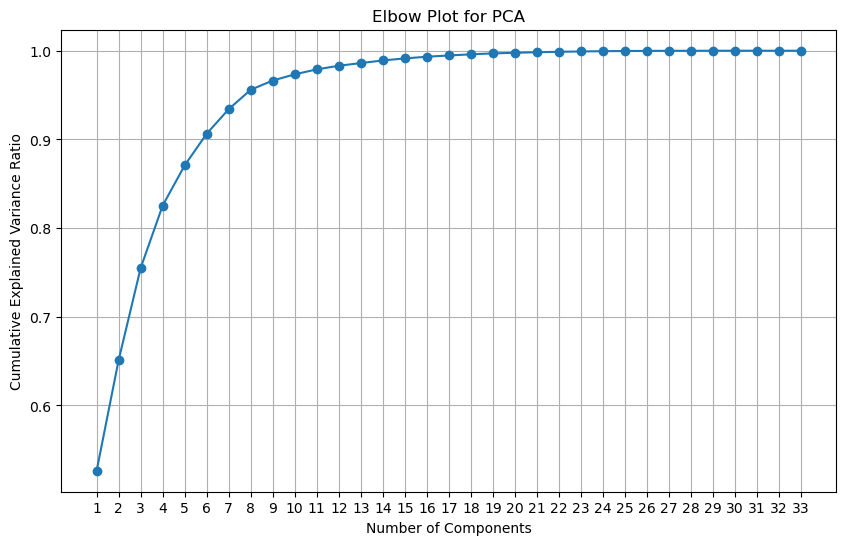

In [183]:
dataGrd = X_train.filter(like='Grd_')
pca=PCA()
pca.fit(dataGrd)

# Calculate cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

# Fit PCA model to the data
pca = PCA(n_components=8)
pca.fit(dataGrd)

transformed_data = pca.transform(dataGrd)
transformed_df2 = pd.DataFrame(transformed_data, columns=['Grd_PC1', 'Grd_PC2','Grd_PC3','Grd_PC4','Grd_PC5','Grd_PC6','Grd_PC7','Grd_PC8'])
transformed_df2_test = pd.DataFrame(pca.transform(X_test.filter(like='Grd_')), columns=['Grd_PC1', 'Grd_PC2','Grd_PC3','Grd_PC4','Grd_PC5','Grd_PC6','Grd_PC7','Grd_PC8'])

testing_transformed_df2 = pd.DataFrame(pca.transform(X_.filter(like='Grd_')), columns=['Grd_PC1', 'Grd_PC2','Grd_PC3','Grd_PC4','Grd_PC5','Grd_PC6','Grd_PC7','Grd_PC8'])

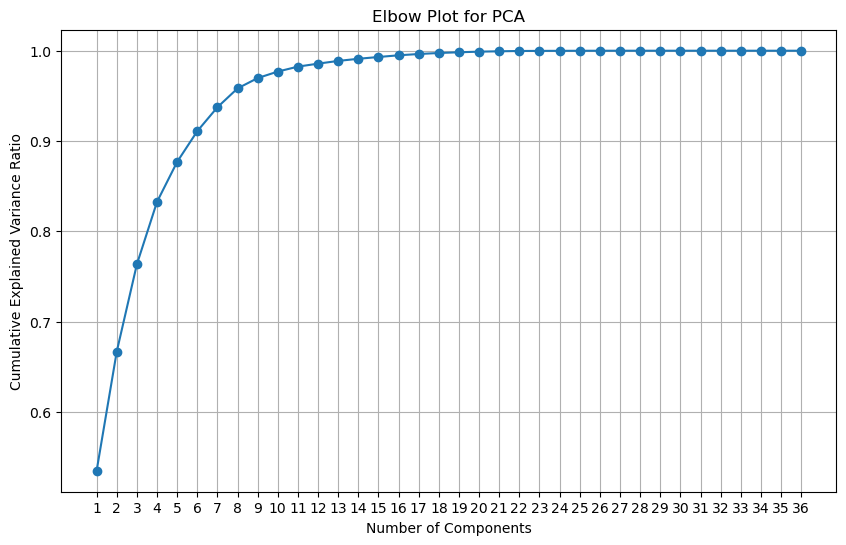

In [184]:
dataProd = X_train.filter(like='Prod_')
pca=PCA()
pca.fit(dataProd)

# Calculate cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

# Fit PCA model to the data
pca = PCA(n_components=1)
pca.fit(dataProd)

transformed_data = pca.transform(dataProd)
transformed_df3 = pd.DataFrame(transformed_data, columns=['Prod_PC1'])
transformed_df3_test = pd.DataFrame(pca.transform(X_test.filter(like='Prod_')), columns=['Prod_PC1'])

testing_transformed_df3 = pd.DataFrame(pca.transform(X_.filter(like='Prod_')), columns=['Prod_PC1'])

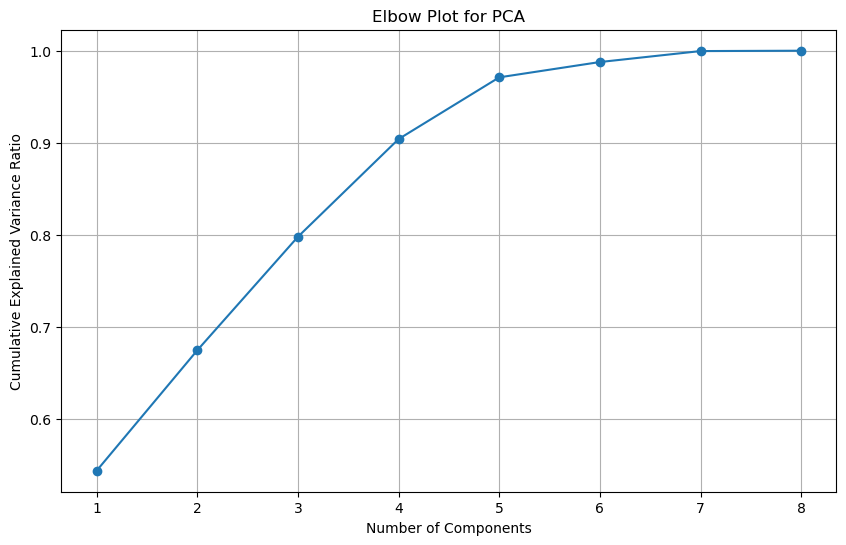

In [185]:
dataAmb = X_train.filter(like='Amb_')
pca=PCA()
pca.fit(dataAmb)

# Calculate cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

# Fit PCA model to the data
pca = PCA(n_components=2)
pca.fit(dataAmb)

transformed_data = pca.transform(dataAmb)
transformed_df4 = pd.DataFrame(transformed_data, columns=['Amb_PC1','Amb_PC2'])
transformed_df4_test = pd.DataFrame(pca.transform(X_test.filter(like='Amb_')), columns=['Amb_PC1','Amb_PC2'])

testing_transformed_df4 = pd.DataFrame(pca.transform(X_.filter(like='Amb_')), columns=['Amb_PC1','Amb_PC2'])

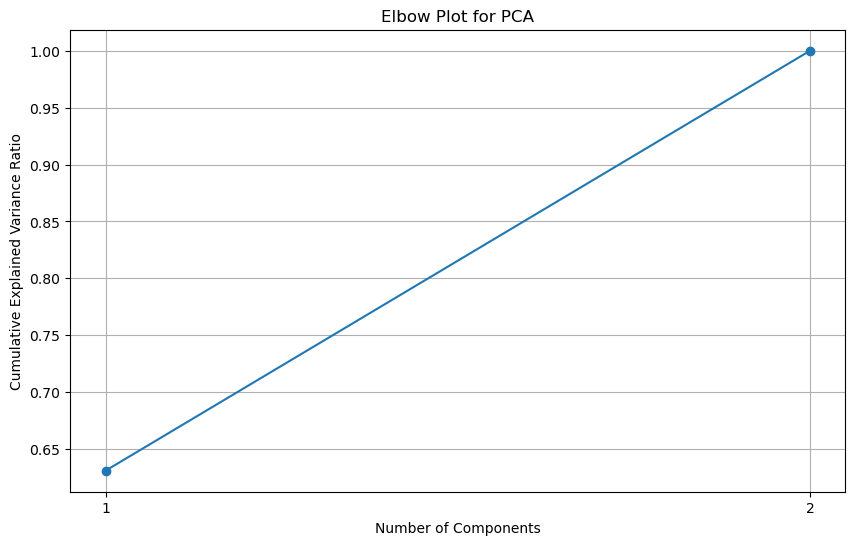

In [186]:
dataNac = X_train.filter(like='Nac_')
pca=PCA()
pca.fit(dataNac)

# Calculate cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

# Fit PCA model to the data
pca = PCA(n_components=1)
pca.fit(dataNac)

transformed_data = pca.transform(dataNac)
transformed_df5 = pd.DataFrame(transformed_data, columns=['Nac_PC1'])
transformed_df5_test = pd.DataFrame(pca.transform(X_test.filter(like='Nac_')), columns=['Nac_PC1'])

testing_transformed_df5 = pd.DataFrame(pca.transform(X_.filter(like='Nac_')), columns=['Nac_PC1'])

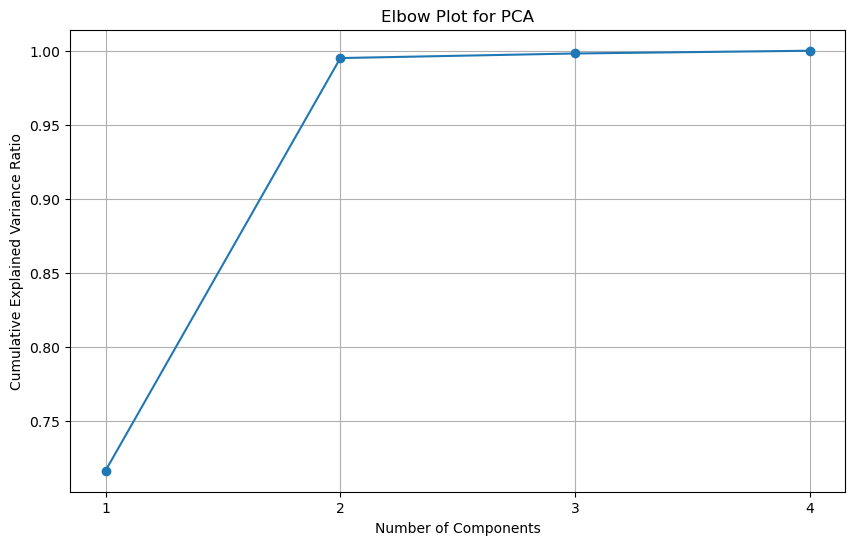

In [187]:
dataRtr = X_train.filter(like='Rtr_')
pca=PCA()
pca.fit(dataRtr)

# Calculate cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

# Fit PCA model to the data
pca = PCA(n_components=2)
pca.fit(dataRtr)

transformed_data = pca.transform(dataRtr)
transformed_df6 = pd.DataFrame(transformed_data, columns=['Rtr_PC1','Rtr_PC2'])
transformed_df6_test = pd.DataFrame(pca.transform(X_test.filter(like='Rtr_')), columns=['Rtr_PC1','Rtr_PC2'])

testing_transformed_df6 = pd.DataFrame(pca.transform(X_.filter(like='Rtr_')), columns=['Rtr_PC1','Rtr_PC2'])

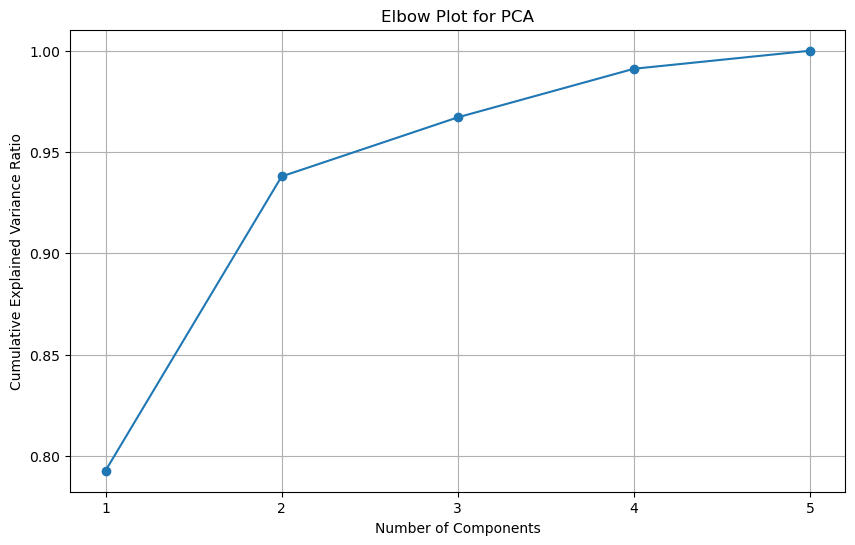

In [188]:
dataCont = X_train.filter(like='Cont_')
pca=PCA()
pca.fit(dataCont)

# Calculate cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

# Fit PCA model to the data
pca = PCA(n_components=2)
pca.fit(dataCont)

transformed_data = pca.transform(dataCont)
transformed_df7 = pd.DataFrame(transformed_data, columns=['Cont_PC1','Cont_PC2'])
transformed_df7_test = pd.DataFrame(pca.transform(X_test.filter(like='Cont_')), columns=['Cont_PC1','Cont_PC2'])

testing_transformed_df7 = pd.DataFrame(pca.transform(X_.filter(like='Cont_')), columns=['Cont_PC1','Cont_PC2'])

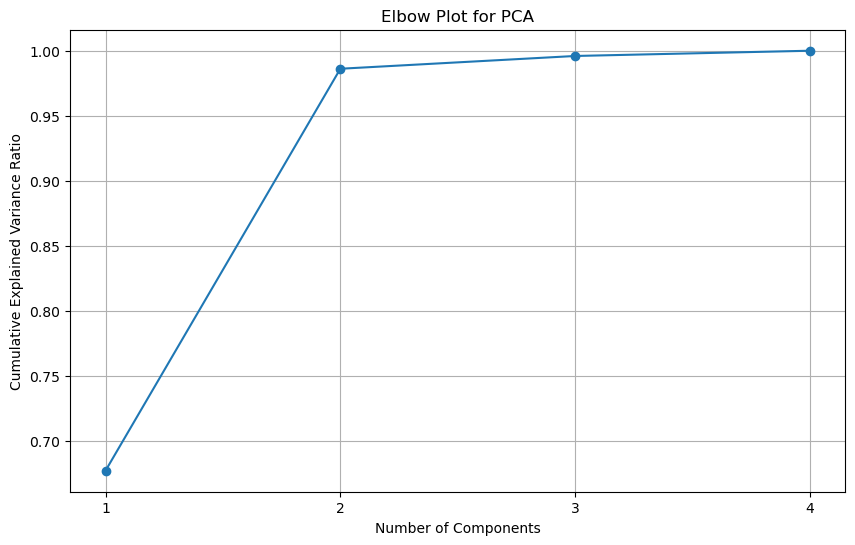

In [189]:
dataBlds = X_train.filter(like='Blds_')
pca=PCA()
pca.fit(dataBlds)

# Calculate cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

# Fit PCA model to the data
pca = PCA(n_components=2)
pca.fit(dataBlds)

transformed_data = pca.transform(dataBlds)
transformed_df8 = pd.DataFrame(transformed_data, columns=['Blds_PC1','Blds_PC2'])

transformed_df8_test = pd.DataFrame(pca.transform(X_test.filter(like='Blds_')), columns=['Blds_PC1','Blds_PC2'])

testing_transformed_df8 = pd.DataFrame(pca.transform(X_.filter(like='Blds_')), columns=['Blds_PC1','Blds_PC2'])



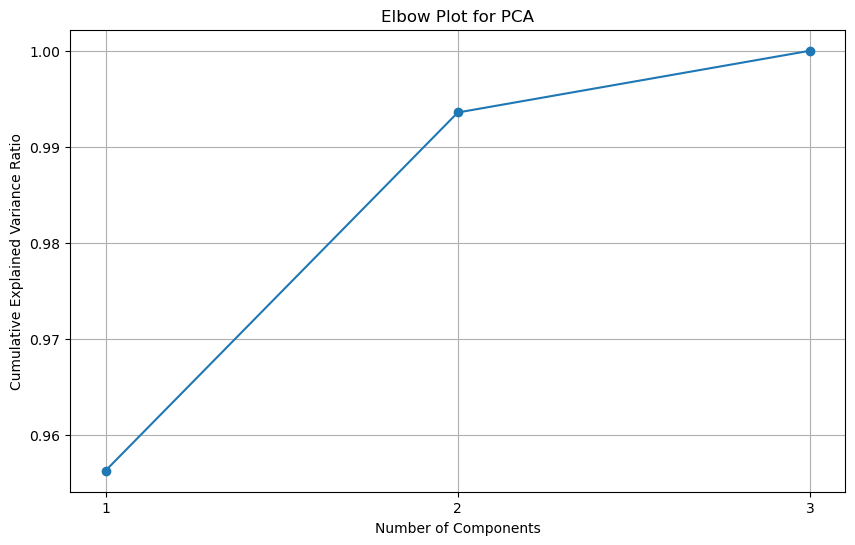

In [190]:
dataHVTrafo = X_train.filter(like='HVTrafo_')
pca=PCA()
pca.fit(dataHVTrafo)

# Calculate cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

# Fit PCA model to the data
pca = PCA(n_components=1)
pca.fit(dataHVTrafo)

transformed_data = pca.transform(dataHVTrafo)
transformed_df9 = pd.DataFrame(transformed_data, columns=['HVTrafo_PC1'])
transformed_df9_test = pd.DataFrame(pca.transform(X_test.filter(like='HVTrafo_')), columns=['HVTrafo_PC1'])

testing_transformed_df9 = pd.DataFrame(pca.transform(X_.filter(like='HVTrafo_')), columns=['HVTrafo_PC1'])

PCA: Env. data

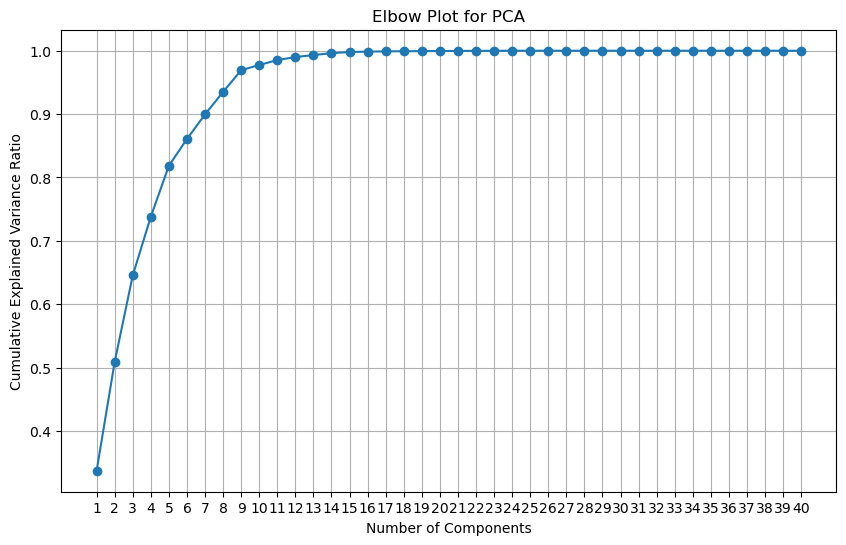

In [191]:
dataEnv = X_train.filter(X.columns[83:-1])
pca=PCA()
pca.fit(dataEnv)

# Calculate cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

# Fit PCA model to the data
pca = PCA(n_components=2)
pca.fit(dataEnv)

transformed_data = pca.transform(dataEnv)
transformed_df10 = pd.DataFrame(transformed_data, columns=['Env_PC1','Env_PC2'])

transformed_df10_test = pd.DataFrame(pca.transform(X_test.filter(X_.columns[83:-1])), columns=['Env_PC1','Env_PC2'])
testing_transformed_df10 = pd.DataFrame(pca.transform(X_.filter(X_.columns[83:-1])), columns=['Env_PC1','Env_PC2'])

Final X matrix

In [250]:
#Training
transformed_df = pd.concat([transformed_df1, transformed_df2, transformed_df3,transformed_df4,transformed_df5,transformed_df6,transformed_df7,transformed_df8,transformed_df9,transformed_df10], axis=1)
temp_df = pd.concat([X_train[['Turbine_ID','Hyd_Oil_Temp_Avg','Gear_Oil_Temp_Avg','Gear_Bear_Temp_Avg','Spin_Temp_Avg']]], axis=1)
merged_transformed_data = pd.concat([temp_df,transformed_df], axis=1)
# Now 'df_scaled' contains all the features scaled

'''merged_transformed_data = pd.concat([X_train[['Timestamp', 'Missing_Weather']],merged_transformed_data], axis=1)
merged_transformed_data['Month'] = merged_transformed_data['Timestamp'].dt.month
X_Prime = merged_transformed_data.drop(columns=['Timestamp'])'''

#Testing set
merged_transformed_data_test = pd.concat([X_test[['Turbine_ID','Hyd_Oil_Temp_Avg','Gear_Oil_Temp_Avg','Gear_Bear_Temp_Avg','Spin_Temp_Avg']],transformed_df1_test, transformed_df2_test, transformed_df3_test,transformed_df4_test,transformed_df5_test,transformed_df6_test,transformed_df7_test,transformed_df8_test,transformed_df9_test,transformed_df10_test], axis=1)

# Now 'df_scaled' contains all the features scaled

merged_transformed_data_test = pd.concat([X_test[['Timestamp', 'Missing_Weather']],merged_transformed_data_test], axis=1)
merged_transformed_data_test['Month'] = merged_transformed_data_test['Timestamp'].dt.month
X_Prime_test = merged_transformed_data_test.drop(columns=['Timestamp'])

#Testing
testing_merged_transformed_data = pd.concat([X_[['Turbine_ID','Hyd_Oil_Temp_Avg','Gear_Oil_Temp_Avg','Gear_Bear_Temp_Avg','Spin_Temp_Avg']],testing_transformed_df1, testing_transformed_df2, testing_transformed_df3,testing_transformed_df4,testing_transformed_df5,testing_transformed_df6,testing_transformed_df7,testing_transformed_df8,testing_transformed_df9,testing_transformed_df10], axis=1)

'''#Scaling the data
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(testing_merged_transformed_data)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=testing_merged_transformed_data.columns)'''

# Now 'df_scaled' contains all the features scaled

testing_merged_transformed_data = pd.concat([X_[['Timestamp', 'Missing_Weather']],testing_merged_transformed_data], axis=1)
testing_merged_transformed_data['Month'] = testing_merged_transformed_data['Timestamp'].dt.month
X_Prime_ = testing_merged_transformed_data.drop(columns=['Timestamp'])

In [251]:
merged_transformed_data_test.isna().sum()

Timestamp             55416
Missing_Weather       55416
Turbine_ID            55416
Hyd_Oil_Temp_Avg      55416
Gear_Oil_Temp_Avg     55416
Gear_Bear_Temp_Avg    55416
Spin_Temp_Avg         55416
Gen_PC1               55416
Gen_PC2               55416
Gen_PC3               55416
Grd_PC1               55416
Grd_PC2               55416
Grd_PC3               55416
Grd_PC4               55416
Grd_PC5               55416
Grd_PC6               55416
Grd_PC7               55416
Grd_PC8               55416
Prod_PC1              55416
Amb_PC1               55416
Amb_PC2               55416
Nac_PC1               55416
Rtr_PC1               55416
Rtr_PC2               55416
Cont_PC1              55416
Cont_PC2              55416
Blds_PC1              55416
Blds_PC2              55416
HVTrafo_PC1           55416
Env_PC1               55416
Env_PC2               55416
Month                 55416
dtype: int64

In [256]:
np.shape(temp_df)

(369023, 5)

### model development:

In [51]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Assuming X_Prime and y are your features and target variable respectively

# Encode categorical variables if any (Turbine_ID, Month can be treated as categorical)
X_Prime['Turbine_ID'] = X_Prime['Turbine_ID'].astype('category')
X_Prime['Month'] = X_Prime['Month'].astype('category')

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_Prime, y, test_size=0.15, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

        GEARBOX       0.00      0.00      0.00       640
HYDRAULIC_GROUP       0.00      0.00      0.00      1702
           NONE       0.96      1.00      0.98     62780

       accuracy                           0.96     65122
      macro avg       0.32      0.33      0.33     65122
   weighted avg       0.93      0.96      0.95     65122



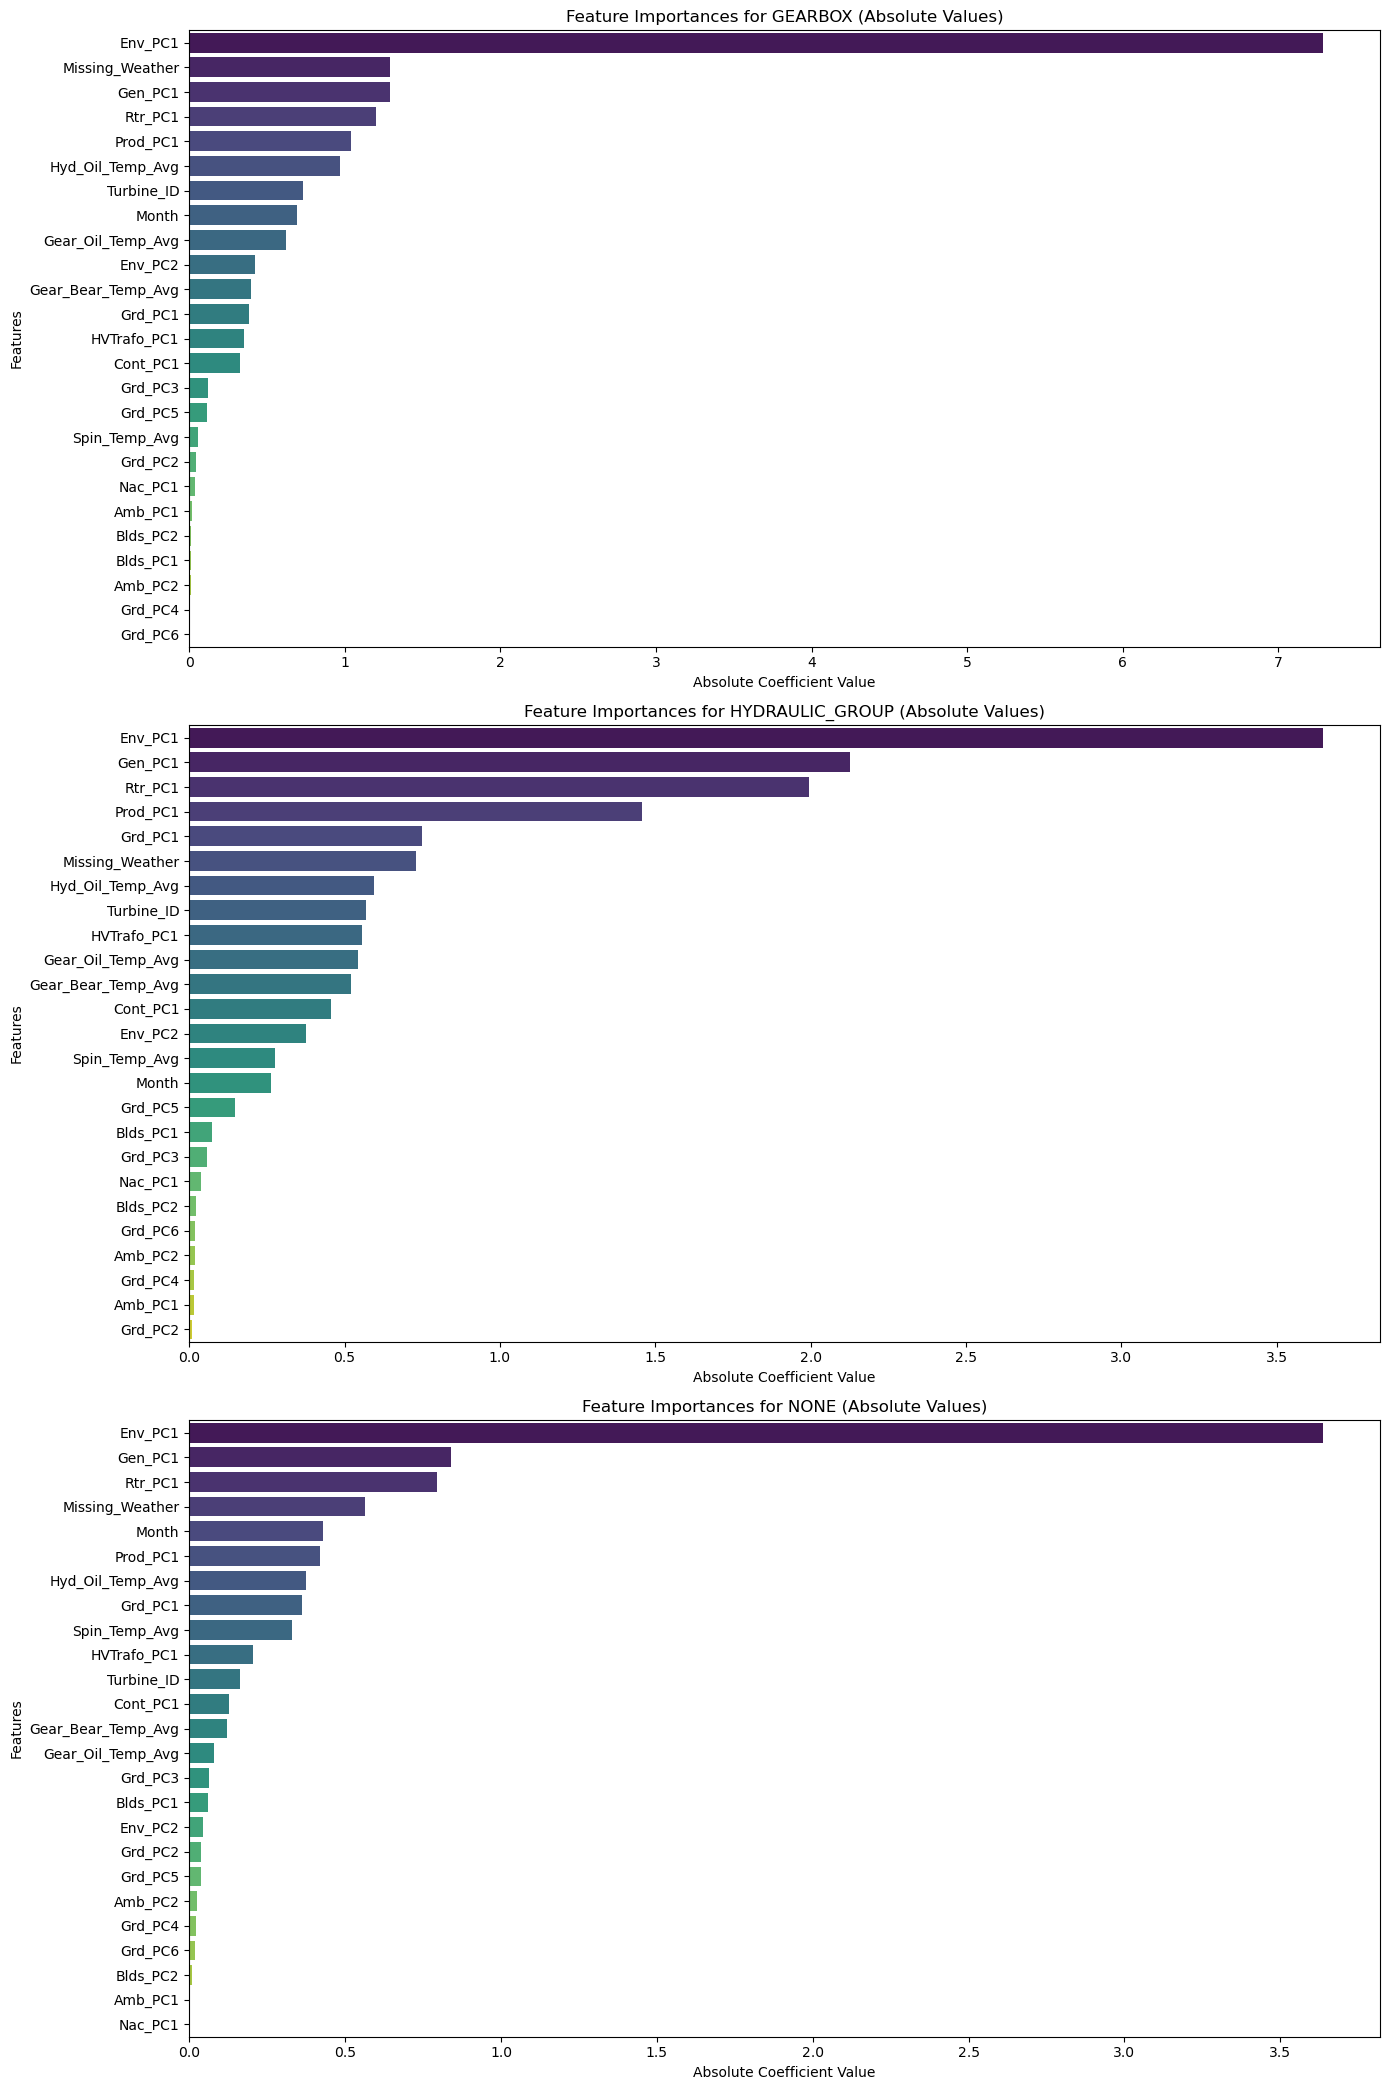

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the coefficients from the model
coefficients = model.coef_

# Create a DataFrame for the coefficients, using the feature names as columns
coef_df = pd.DataFrame(coefficients, columns=X_Prime.columns, index=model.classes_)

# Setup the plotting environment
plt.figure(figsize=(14, 7 * len(model.classes_)))

# Iterate over each class and create a subplot for the coefficients of each class
for idx, class_name in enumerate(model.classes_):
    plt.subplot(len(model.classes_), 1, idx + 1)
    # Select the row corresponding to the class from the DataFrame
    # Convert coefficients to their absolute values and sort them in descending order
    class_coefs = coef_df.loc[class_name].abs().sort_values(ascending=False)
    
    # Create a bar plot of the absolute coefficients for the class
    sns.barplot(x=class_coefs.values, y=class_coefs.index, palette="viridis")
    
    # Setting plot title and labels
    plt.title(f'Feature Importances for {class_name} (Absolute Values)')
    plt.xlabel('Absolute Coefficient Value')
    plt.ylabel('Features')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

## ADA BOOST

In [117]:
'''from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

# Define base estimator
base_estimator = DecisionTreeClassifier()

# Define AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator)

# Define parameter grid for GridSearchCV
param_grid = {
    'base_estimator__max_depth': list(range(3,15))  # Try different values of max_depth
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(ada_boost, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_test, y_test)
# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)'''


'from sklearn.model_selection import GridSearchCV, StratifiedKFold\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.datasets import make_classification\n\n# Define base estimator\nbase_estimator = DecisionTreeClassifier()\n\n# Define AdaBoost classifier\nada_boost = AdaBoostClassifier(base_estimator=base_estimator)\n\n# Define parameter grid for GridSearchCV\nparam_grid = {\n    \'base_estimator__max_depth\': list(range(3,15))  # Try different values of max_depth\n}\n\n# Define cross-validation strategy\ncv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)\n\n# Perform grid search with cross-validation\ngrid_search = GridSearchCV(ada_boost, param_grid=param_grid, cv=cv, scoring=\'accuracy\', n_jobs=-1)\ngrid_search.fit(X_test, y_test)\n# Get best parameters and score\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint("Best Parameters:", best_params)\nprint("Best Score:", best_

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import math

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 75, 100, 150],  # Try different numbers of trees
    'max_depth': [3, 5, 8, 10]  # Try different max depths for the trees
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42,max_features='sqrt')

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'n_estimators': 50}


In [243]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Example: Load your data into X_Prime and y
# X_Prime, y = load_your_data_here()

# Initialize the base estimator
base_estimator = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)


# Set up AdaBoost with a decision tree as the base estimator
ada_classifier = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=150,   # The maximum number of estimators at which boosting is terminated #150
    learning_rate=0.2, # Controls the contribution of each classifier #tested with 0.1 #0.6
    random_state=42
)

# Fit the AdaBoost model on the training data
ada_classifier.fit(X_train, y_train)

# Now generate predictions on the test data
predictions = ada_classifier.predict(X_test)

# Print the classification report to see the model's performance
print(classification_report(y_test, predictions))


                 precision    recall  f1-score   support

        GEARBOX       0.97      0.68      0.79       640
HYDRAULIC_GROUP       0.94      0.37      0.53      1702
           NONE       0.98      1.00      0.99     62780

       accuracy                           0.98     65122
      macro avg       0.96      0.68      0.77     65122
   weighted avg       0.98      0.98      0.98     65122



ADA Data

In [244]:
X_Prime_ADA = X_Prime.copy()
X_Prime_ADA['predictions'] = ada_classifier.predict(X_Prime_ADA)
X_Prime_ADA['Timestamp'] = X['Timestamp']

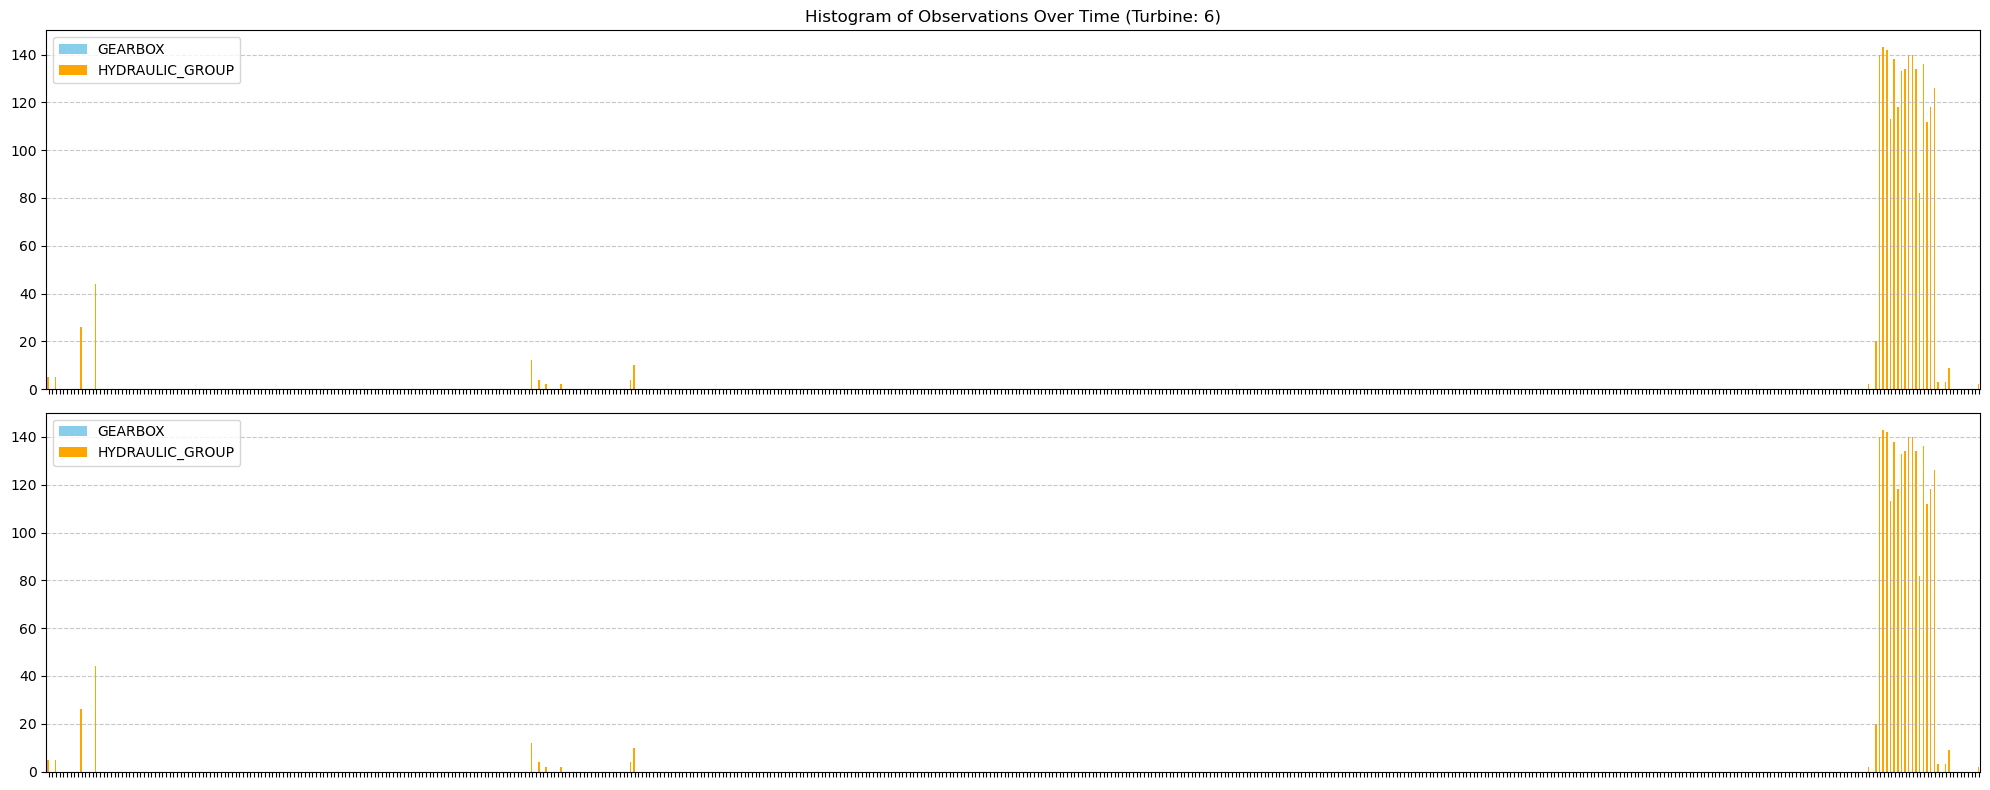

In [245]:
ID=6
X_Prime_ADA_ID = X_Prime_ADA[X_Prime_ADA['Turbine_ID']==ID]
X_Prime_ADA_ID = pd.merge(X_Prime_ADA_ID, training_merged_data[['Component','Timestamp', 'Turbine_ID']], left_on=['Timestamp', 'Turbine_ID'],right_on=['Timestamp', 'Turbine_ID'], how='inner')


# Assuming you have a DataFrame called 'data' with a column named 'timestamp' and a column named 'y_column'
# 'timestamp' column should be in datetime format

# Step 1: Extract timestamps and y_column values
timestamps = X_Prime_ADA_ID['Timestamp']
y_values = X_Prime_ADA_ID['predictions']

# Filter data based on the specific values
specific_value1 = 'GEARBOX'
specific_value2 = 'HYDRAULIC_GROUP'

filtered_data1 = X_Prime_ADA_ID[X_Prime_ADA_ID['predictions'] == specific_value1]
filtered_data2 = X_Prime_ADA_ID[X_Prime_ADA_ID['predictions'] == specific_value2]

# Bin the data by time and count observations for both values
histogram_data1 = filtered_data1.groupby(pd.Grouper(key='Timestamp', freq='D')).size()
histogram_data2 = filtered_data2.groupby(pd.Grouper(key='Timestamp', freq='D')).size()

# Combine indices from both histograms
all_timestamps = sorted(set(histogram_data1.index) | set(histogram_data2.index))

# Create a DataFrame with all timestamps and fill missing values with 0
if histogram_data1.empty:   
    histogram_data1 = histogram_data1.reindex(all_timestamps, fill_value=0)
if histogram_data2.empty:   
    histogram_data2 = histogram_data2.reindex(all_timestamps, fill_value=0)


# Plot the histograms
fig, axs = plt.subplots(2, 1, figsize=(20, 8))

histogram_data1.plot(kind='bar', color='skyblue', position=0, width=0.4, label=specific_value1, ax=axs[0])
histogram_data2.plot(kind='bar', color='orange', position=1, width=0.4, label=specific_value2, ax=axs[0])

axs[0].set_title(f"Histogram of Observations Over Time (Turbine: {ID})")
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].set_xlabel('')  # Remove x-axis label
axs[0].set_xticks(range(len(all_timestamps)))
axs[0].set_xticklabels([])  # Remove x-axis labels for both histograms

#Second Hist

filtered_data1 = X_Prime_ADA_ID[X_Prime_ADA_ID['Component'] == specific_value1]
filtered_data2 = X_Prime_ADA_ID[X_Prime_ADA_ID['Component'] == specific_value2]
# Bin the data by time and count observations for both values
if histogram_data1.empty:   
    histogram_data1 = filtered_data1.groupby(pd.Grouper(key='Timestamp', freq='D')).size()
if histogram_data2.empty:
    histogram_data2 = filtered_data2.groupby(pd.Grouper(key='Timestamp', freq='D')).size()

histogram_data1.plot(kind='bar', color='skyblue', position=0, width=0.4, label=specific_value1, ax=axs[1])
histogram_data2.plot(kind='bar', color='orange', position=1, width=0.4, label=specific_value2, ax=axs[1])

axs[1].tick_params(axis='x', rotation=45)
axs[1].legend()
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].set_xlabel('')  # Remove x-axis label
axs[1].set_xticks(range(len(all_timestamps)))
axs[1].set_xticklabels([])  # Remove x-axis labels for both histograms

plt.tight_layout()
plt.show()

## Gradient Boost

In [79]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable y
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
original_values = label_encoder.inverse_transform(y_train_encoded)
np.unique(original_values)

array(['GEARBOX', 'HYDRAULIC_GROUP', 'NONE'], dtype=object)

In [80]:
# Initialize LabelEncoder
label_encodersTurb = LabelEncoder()
label_encodersMon = LabelEncoder()

# Convert categorical variables to numeric representations
X_train_numeric = X_train.copy()
X_test_numeric = X_test.copy()

# Encode categorical columns

X_train_numeric['Turbine_ID'] = label_encodersTurb.fit_transform(X_train['Turbine_ID'])
X_test_numeric['Turbine_ID'] = label_encodersTurb.transform(X_test['Turbine_ID'])

X_train_numeric['Month'] = label_encodersMon.fit_transform(X_train['Month'])
X_test_numeric['Month'] = label_encodersMon.transform(X_test['Month'])

#Test with dropping Turbine_ID
X_train_numeric.drop(columns=['Turbine_ID'], inplace=True)
X_test_numeric.drop(columns=['Turbine_ID'], inplace=True)

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [8, 10, 12],
    'learning_rate': [0.6, 0.5, 0.4, 0.3],
    'n_estimators': [100,150 ,200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.33, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='f1_macro', refit='f1_macro', verbose=3, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_numeric, y_train_encoded)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1-macro score on validation data: {:.4f}".format(grid_search.best_score_))

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test_numeric)

# Evaluate the model
print("Test set performance:")
print(classification_report(y_test_encoded, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 2/5] END colsample_bytree=0.33, learning_rate=0.6, max_depth=8, n_estimators=100, subsample=1.0;, score=0.844 total time=  14.6s
[CV 3/5] END colsample_bytree=0.33, learning_rate=0.6, max_depth=8, n_estimators=100, subsample=1.0;, score=0.845 total time=  14.7s
[CV 1/5] END colsample_bytree=0.33, learning_rate=0.6, max_depth=8, n_estimators=100, subsample=1.0;, score=0.849 total time=  14.7s
[CV 1/5] END colsample_bytree=0.33, learning_rate=0.6, max_depth=8, n_estimators=100, subsample=0.8;, score=0.845 total time=  15.4s
[CV 2/5] END colsample_bytree=0.33, learning_rate=0.6, max_depth=8, n_estimators=100, subsample=0.8;, score=0.834 total time=  15.4s
[CV 3/5] END colsample_bytree=0.33, learning_rate=0.6, max_depth=8, n_estimators=100, subsample=0.8;, score=0.849 total time=  15.7s
[CV 5/5] END colsample_bytree=0.33, learning_rate=0.6, max_depth=8, n_estimators=100, subsample=0.8;, score=0.832 total time=  15.5s
[CV 4

In [59]:
# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    max_depth=12,
    learning_rate=0.4,
    n_estimators=200,
    subsample=1.0,
    colsample_bytree=1.0
)

# Train the XGBoost model
xgb_model.fit(X_train_numeric, y_train_encoded)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_numeric)

# Evaluate the model
print("Test set performance:")
print(classification_report(y_test_encoded, y_pred))

Test set performance:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       640
           1       0.96      0.83      0.89      1702
           2       0.99      1.00      1.00     62780

    accuracy                           0.99     65122
   macro avg       0.98      0.90      0.94     65122
weighted avg       0.99      0.99      0.99     65122



_____

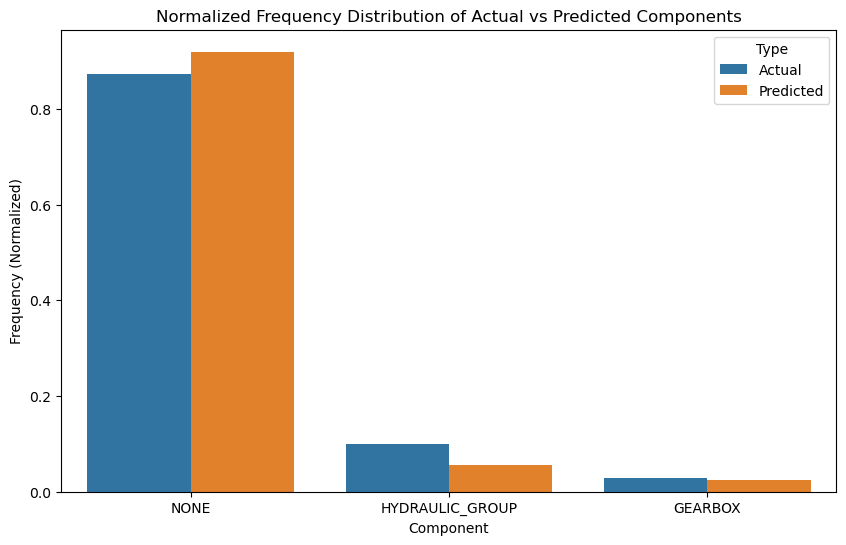

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert both to pandas Series if they are not already, for easier manipulation.
y_test_series = pd.Series(y_test, name='Actual')
predictions_series = pd.Series(predictions, name='Predicted')

# Combine both series into a single DataFrame for easier plotting.
results = pd.concat([y_test_series, predictions_series], axis=1)

# Prepare data for plotting by counting occurrences
actual_counts = results['Actual'].value_counts(normalize=True).rename_axis('Component').reset_index(name='Frequency')
predicted_counts = results['Predicted'].value_counts(normalize=True).rename_axis('Component').reset_index(name='Frequency')
actual_counts['Type'] = 'Actual'
predicted_counts['Type'] = 'Predicted'

# Combine into a single DataFrame for plotting
all_counts = pd.concat([actual_counts, predicted_counts])

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Component', y='Frequency', hue='Type', data=all_counts)
plt.title('Normalized Frequency Distribution of Actual vs Predicted Components')
plt.xlabel('Component')
plt.ylabel('Frequency (Normalized)')
plt.legend(title='Type')

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Exclude the 'NONE' category and prepare the data for plotting
data_to_plot = category_indicators.drop(columns=['NONE'])

# Ensure the index is sorted
data_to_plot.sort_index(inplace=True)

# Plotting
plt.figure(figsize=(15, 8))  # Set the figure size to be large
for column in data_to_plot.columns:
    plt.scatter(data_to_plot.index, data_to_plot[column], label=column, alpha=0.6, s=10)  # s is the size of each point

plt.title('Scatter Plot of HYDRO and GEARBOX Categories Over Time')
plt.xlabel('Index (Time)')
plt.ylabel('Presence (0 or 1)')
plt.legend(title='Component')
plt.grid(True)
plt.show()


NameError: name 'category_indicators' is not defined

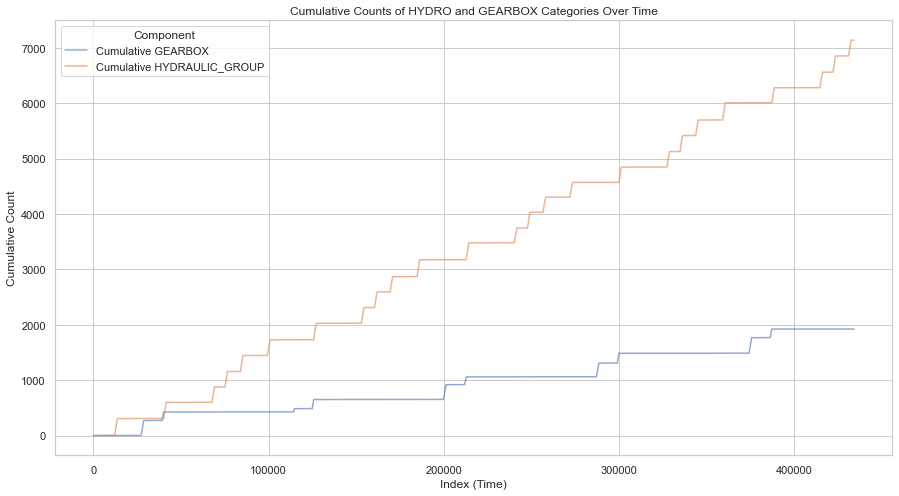

In [ ]:
import matplotlib.pyplot as plt

# Exclude the 'NONE' category and prepare the data for plotting
data_to_plot = category_indicators.drop(columns=['NONE'])

# Ensure the index is sorted
data_to_plot.sort_index(inplace=True)

# Compute cumulative sums for the categories
cumulative_data = data_to_plot.cumsum()

# Plotting the cumulative sums
plt.figure(figsize=(15, 8))  # Set the figure size to be large
for column in cumulative_data.columns:
    plt.plot(cumulative_data.index, cumulative_data[column], label=f'Cumulative {column}', alpha=0.6)

plt.title('Cumulative Counts of HYDRO and GEARBOX Categories Over Time')
plt.xlabel('Index (Time)')
plt.ylabel('Cumulative Count')
plt.legend(title='Component')
plt.grid(True)
plt.show()


In [ ]:
'''import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Prime, y, test_size=0.1, random_state=42)

# Create and train the SVM model
svm_model = SVC(kernel='rbf', probability=True) #'rbf'
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = svm_model.predict_proba(X_test)

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'green', 'red']
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 3-Class SVM Classification')
plt.legend(loc="lower right")
plt.show()'''

In [260]:
predictions= svm_model.predict(X_Prime)

NameError: name 'svm_model' is not defined

In [ ]:
predictions=pd.DataFrame(predictions)
predictions.value_counts()

NONE    434145
Name: count, dtype: int64

## Predictions

AdaBoost

In [250]:
X_Prime_ADA_ = X_Prime_.copy()
X_Prime_ADA_['predictions'] = ada_classifier.predict(X_Prime_ADA_)
X_Prime_ADA_['Timestamp'] = X_['Timestamp']


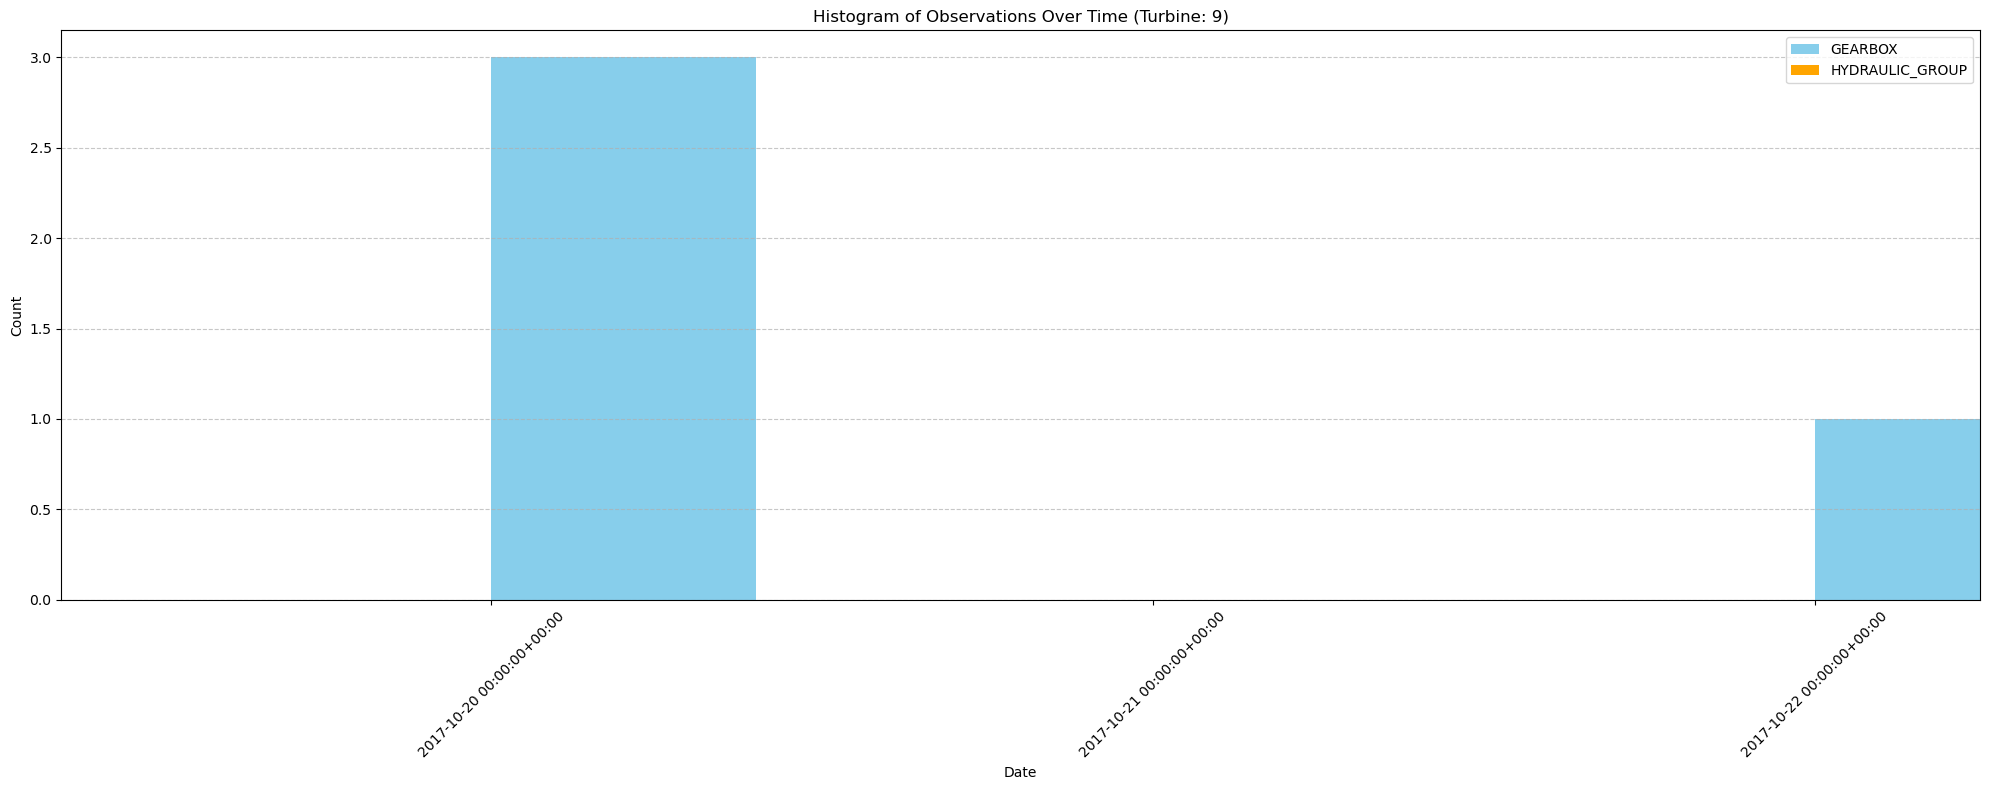

In [256]:
ID=9
X_Prime_ADA_ID = X_Prime_ADA_[X_Prime_ADA_['Turbine_ID']==ID].copy()


# Assuming you have a DataFrame called 'data' with a column named 'timestamp' and a column named 'y_column'
# 'timestamp' column should be in datetime format

# Step 1: Extract timestamps and y_column values
timestamps = X_Prime_ADA_ID['Timestamp']
y_values = X_Prime_ADA_ID['predictions']

# Filter data based on the specific values
specific_value1 = 'GEARBOX'
specific_value2 = 'HYDRAULIC_GROUP'

filtered_data1 = X_Prime_ADA_ID[X_Prime_ADA_ID['predictions'] == specific_value1]
filtered_data2 = X_Prime_ADA_ID[X_Prime_ADA_ID['predictions'] == specific_value2]

# Bin the data by time and count observations for both values

histogram_data1 = filtered_data1.groupby(pd.Grouper(key='Timestamp', freq='D')).size()
histogram_data2 = filtered_data2.groupby(pd.Grouper(key='Timestamp', freq='D')).size()

# Combine indices from both histograms
all_timestamps = sorted(set(histogram_data1.index) | set(histogram_data2.index))

# Create a DataFrame with all timestamps and fill missing values with 0
histogram_data1 = histogram_data1.reindex(all_timestamps, fill_value=0)
histogram_data2 = histogram_data2.reindex(all_timestamps, fill_value=0)

# Plot the histograms only if the data frames are not empty
if not histogram_data1.empty or not histogram_data2.empty:
    fig, ax = plt.subplots(figsize=(20, 8))

    if not histogram_data1.empty:
        histogram_data1.plot(kind='bar', color='skyblue', position=0, width=0.4, label=specific_value1, ax=ax)

    if not histogram_data2.empty:
        histogram_data2.plot(kind='bar', color='orange', position=1, width=0.4, label=specific_value2, ax=ax)

    ax.set_title(f"Histogram of Observations Over Time (Turbine: {ID})")
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')

    plt.tight_layout()
    plt.show()
else:
    print("Both histograms are empty.")


XGBoost

In [82]:
X_Prime_XGB_ = X_Prime_.copy()

# Convert categorical variables to numeric representations
X_train_numeric_ = X_Prime_XGB_.copy()

# Encode categorical columns

##Testing with dropping turbine_ID
X_train_numeric_.drop(columns=['Turbine_ID'], inplace=True)
#X_train_numeric_['Turbine_ID'] = label_encodersTurb.transform(X_train_numeric_['Turbine_ID'])
X_train_numeric_['Month'] = label_encodersMon.transform(X_train_numeric_['Month'])


#Pred ------change xgb_model to best_xgb_model
X_Prime_XGB_['predictions'] = best_xgb_model.predict(X_train_numeric_)
X_Prime_XGB_['predictions'] = label_encoder.inverse_transform(X_Prime_XGB_['predictions'])

X_Prime_XGB_['Timestamp'] = X_['Timestamp']



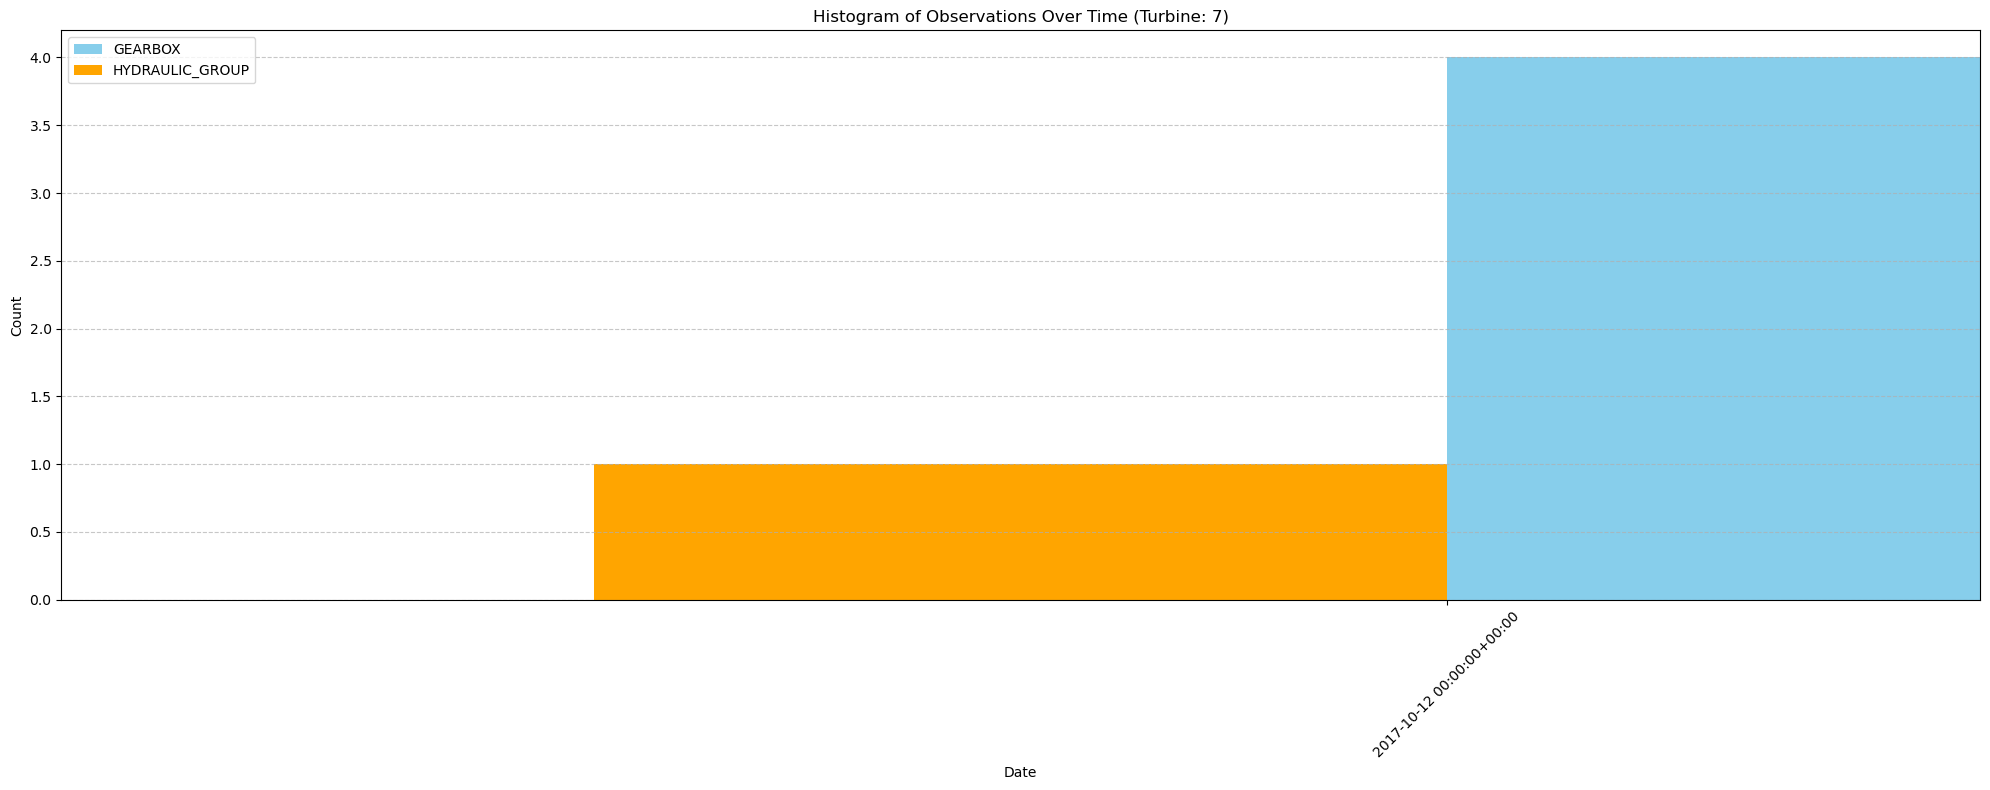

In [98]:
ID=7
X_Prime_XGB_ID = X_Prime_XGB_[X_Prime_XGB_['Turbine_ID']==ID].copy()


# Assuming you have a DataFrame called 'data' with a column named 'timestamp' and a column named 'y_column'
# 'timestamp' column should be in datetime format

# Step 1: Extract timestamps and y_column values
timestamps = X_Prime_XGB_ID['Timestamp']
y_values = X_Prime_XGB_ID['predictions']

# Filter data based on the specific values
specific_value1 = 'GEARBOX'
specific_value2 = 'HYDRAULIC_GROUP'

filtered_data1 = X_Prime_XGB_ID[X_Prime_XGB_ID['predictions'] == specific_value1]
filtered_data2 = X_Prime_XGB_ID[X_Prime_XGB_ID['predictions'] == specific_value2]

# Bin the data by time and count observations for both values

histogram_data1 = filtered_data1.groupby(pd.Grouper(key='Timestamp', freq='D')).size()
histogram_data2 = filtered_data2.groupby(pd.Grouper(key='Timestamp', freq='D')).size()

# Combine indices from both histograms
all_timestamps = sorted(set(histogram_data1.index) | set(histogram_data2.index))

# Create a DataFrame with all timestamps and fill missing values with 0
histogram_data1 = histogram_data1.reindex(all_timestamps, fill_value=0)
histogram_data2 = histogram_data2.reindex(all_timestamps, fill_value=0)

# Plot the histograms only if the data frames are not empty
if not histogram_data1.empty or not histogram_data2.empty:
    fig, ax = plt.subplots(figsize=(20, 8))

    if not histogram_data1.empty:
        histogram_data1.plot(kind='bar', color='skyblue', position=0, width=0.4, label=specific_value1, ax=ax)

    if not histogram_data2.empty:
        histogram_data2.plot(kind='bar', color='orange', position=1, width=0.4, label=specific_value2, ax=ax)

    ax.set_title(f"Histogram of Observations Over Time (Turbine: {ID})")
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')

    plt.tight_layout()
    plt.show()
else:
    print("Both histograms are empty.")

In [94]:
X_Prime_XGB_['predictions'].value_counts()

predictions
NONE               86254
HYDRAULIC_GROUP      986
GEARBOX              399
Name: count, dtype: int64